In [252]:
# !pip install --upgrade pip

import os

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from tqdm import tqdm
import warnings
import random


pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
import seaborn as sns


# Global utitlity functions are in separate notebook
%run ./SEED-CONSTANTS.ipynb

SEED: 567
FINAL_EXP_RESULTS_PATH: clip=False_experiments_results
--------------------SEED and CONSTANTS imported--------------------


In [ ]:
# FINAL_EXP_RESULTS_PATH="final_experiments_results"
FINAL_EXP_RESULTS_PATH#="clip=False_experiments_results"

CLASSIFIER_TYPE_LST=["OCSVM", "kNN", "LOF", "IF"]

TRAINING_CONFIG_DICT_FILE_NAME#="model_archi_performance_lr_dict.json"
TRAINING_CONFIG_DICT_FOLDER_PATH#="siamese_cnn_results_final"

'siamese_cnn_results_final'

In [239]:
# df = df.loc[df.groupby([("", "type")])[("", "mean rank"),].idxmin()[('', 'mean rank')]]
# df

In [240]:
df.insert(0, ("", "classifier"), "OCSVM")
df

ValueError: cannot insert ('', 'classifier'), already exists

In [529]:
top_eer_df_lst=[]
top_gini_df_lst=[]
for clf_name in CLASSIFIER_TYPE_LST:
    eer_df = pd.read_json(f"{FINAL_EXP_RESULTS_PATH}/WACA-{clf_name}/WACA-{clf_name}-df.json")
    gini_df = pd.read_json(f"{FINAL_EXP_RESULTS_PATH}/WACA-{clf_name}/WACA-{clf_name}-gini-df.json")
    
    idx_tuples = [eval(i) for i in eer_df.columns.tolist()]

    # both eer_df and gini_df have same columns
    # Convert list of tuples back to a MultiIndex
    multiindex_columns = pd.MultiIndex.from_tuples(idx_tuples)

    eer_df.columns = multiindex_columns
    top_eer_df = eer_df.loc[eer_df.groupby([("", "type")])[("", "mean rank"),].idxmin()[('', 'mean rank')]]
    top_eer_df.insert(0, ("", "classifier"), clf_name)
    
    top_eer_df_lst.append(top_eer_df)
    
    
    gini_df.columns = multiindex_columns
    # top_gini_df = gini_df.loc[eer_df.groupby([("", "type")])[("", "mean rank"),].idxmin()[('', 'mean rank')]]
    # top_gini_df.insert(0, ("", "classifier"), clf_name)
    
    gini_joint_cols=[
                    (           '',    'cut_off_freq'),
                    (           '',        'EMA_span'),
                    (           '',     'SMA_winsize'),
                    (           '',            'type'),]
    
    matched_gini_df = top_eer_df[gini_joint_cols].merge(gini_df, 
                                                        on=gini_joint_cols,
                                                        how='inner')

    matched_gini_df.insert(0, ("", "classifier"), clf_name)
    
    
    # top_gini_df_lst.append(top_gini_df)

    top_gini_df_lst.append(matched_gini_df)


# EER
top_clf_eer_df = pd.concat(top_eer_df_lst)
top_clf_eer_df.drop(("", 'mean rank'), axis=1, inplace=True)
top_clf_eer_df.reset_index(drop=True, inplace=True)

top_clf_eer_df.insert(0, ("", 'mean rank'), top_clf_eer_df[("", "mean")].rank(method='min').astype(np.int64))
top_clf_eer_df=top_clf_eer_df.sort_values(("", 'mean rank'))

# GINI
top_clf_gini_df = pd.concat(top_gini_df_lst)
top_clf_gini_df.drop(("", 'mean rank'), axis=1, inplace=True)
top_clf_gini_df.reset_index(drop=True, inplace=True)

top_clf_gini_df.insert(0, ("", 'mean rank'), top_clf_gini_df[("", "mean")].rank(method='min').astype(np.int64))
top_clf_gini_df=top_clf_gini_df.sort_values(("", 'mean rank'))

WACA_top_clf_eer_df=top_clf_eer_df
WACA_top_clf_gini_df=top_clf_gini_df

WACA_top_clf_eer_df.reset_index(drop=True, inplace=True)
WACA_top_clf_gini_df.reset_index(drop=True, inplace=True)

In [530]:
# WACA_top_clf_eer_df[WACA_top_clf_eer_df.columns[:9]]
WACA_top_clf_eer_df

Window Size  \
   mean rank classifier cut_off_freq EMA_span SMA_winsize   type         125   
0          1        LOF            -       49           -  Naive    0.129547   
1          2      OCSVM           24       30           -  Naive    0.150753   
2          3        LOF           26        -           2   Real    0.154874   
3          4        kNN            -       37           -  Naive    0.151440   
4          5        LOF            -        -           -      -    0.159600   
5          6      OCSVM           26        -           2   Real    0.161919   
6          7        kNN           33        -           -   Real    0.181438   
7          8      OCSVM            -        -           -      -    0.164775   
8          9        kNN            -        -           -      -    0.193208   
9         10         IF            -       37           -  Naive    0.196879   
10        11         IF           49        -           -   Real    0.233231   
11        12         IF            -        -           -      -    0.239770   

                                                                          \
         250       500       750      1000      1250      1500      1750   
0   0.090563  0.062048  0.050370  0.041057  0.038831  0.033608  0.033575   
1   0.099805  0.064574  0.055185  0.043135  0.037153  0.032977  0.033688   
2   0.096507  0.064190  0.048822  0.042864  0.040104  0.037037  0.031965   
3   0.100876  0.066600  0.053737  0.044941  0.038657  0.033745  0.034783   
4   0.102140  0.066176  0.054276  0.046387  0.041725  0.035460  0.035910   
5   0.099279  0.064913  0.049414  0.045881  0.044907  0.036927  0.038084   
6   0.104868  0.068005  0.048114  0.043948  0.038368  0.041152  0.035910   
7   0.107527  0.067537  0.059697  0.048925  0.048507  0.038162  0.039565   
8   0.113839  0.067604  0.054209  0.048419  0.042245  0.040123  0.036634   
9   0.167937  0.141428  0.130236  0.116974  0.115694  0.123978  0.122625   
10  0.188434  0.155029  0.145380  0.140542  0.131343  0.128656  0.124348   
11  0.190747  0.164511  0.145838  0.144589  0.133275  0.134019  0.135185   

                                  
        2000      mean  variance  
0   0.034444  0.057116  0.001081  
1   0.036519  0.061532  0.001578  
2   0.040556  0.061880  0.001603  
3   0.036944  0.062414  0.001575  
4   0.037315  0.064332  0.001727  
5   0.042944  0.064919  0.001697  
6   0.039537  0.066816  0.002328  
7   0.039611  0.068256  0.001781  
8   0.039815  0.070677  0.002688  
9   0.117111  0.136985  0.000779  
10  0.125796  0.152529  0.001316  
11  0.134352  0.158032  0.001299

In [531]:
WACA_top_clf_gini_df

Window Size  \
   mean rank classifier cut_off_freq EMA_span SMA_winsize   type         125   
0          1         IF            -        -           -      -    0.335525   
1          2         IF           49        -           -   Real    0.329424   
2          3         IF            -       37           -  Naive    0.411922   
3          4      OCSVM           26        -           2   Real    0.517772   
4          5      OCSVM            -        -           -      -    0.505542   
5          6        kNN            -        -           -      -    0.500338   
6          7        kNN           33        -           -   Real    0.500188   
7          8        kNN            -       37           -  Naive    0.590468   
8          9        LOF            -        -           -      -    0.535434   
9         10      OCSVM           24       30           -  Naive    0.585105   
10        11        LOF           26        -           2   Real    0.536458   
11        12        LOF            -       49           -  Naive    0.641991   

                                                                          \
         250       500       750      1000      1250      1500      1750   
0   0.382443  0.422797  0.444283  0.481188  0.491695  0.505200  0.497006   
1   0.370514  0.415564  0.441483  0.490492  0.509331  0.527388  0.549604   
2   0.420017  0.447742  0.479385  0.517618  0.514364  0.514173  0.500893   
3   0.643776  0.751348  0.803055  0.809384  0.829675  0.845695  0.831326   
4   0.648686  0.760365  0.802483  0.824444  0.837377  0.846027  0.853184   
5   0.643844  0.750055  0.803336  0.823235  0.840662  0.852607  0.863799   
6   0.637842  0.756474  0.803453  0.822859  0.842396  0.852752  0.860681   
7   0.680762  0.758776  0.798135  0.818997  0.831698  0.839841  0.861540   
8   0.669907  0.768247  0.812912  0.834429  0.838725  0.854134  0.869947   
9   0.681948  0.771622  0.795331  0.830572  0.835501  0.848243  0.856070   
10  0.673346  0.776024  0.818321  0.830838  0.840478  0.861742  0.871662   
11  0.711383  0.774322  0.806974  0.833123  0.833132  0.851602  0.870412   

                                  
        2000      mean  variance  
0   0.533526  0.454852  0.004147  
1   0.558650  0.465828  0.006592  
2   0.521120  0.480804  0.001895  
3   0.843836  0.763985  0.012590  
4   0.854115  0.770247  0.014135  
5   0.876040  0.772657  0.015597  
6   0.878800  0.772827  0.015805  
7   0.871769  0.783554  0.008660  
8   0.884366  0.785345  0.012973  
9   0.869509  0.785989  0.008959  
10  0.875588  0.787162  0.012772  
11  0.873434  0.799597  0.006092

In [532]:
gini_joint_cols=[
                (           '',      'classifier'),
                (           '',    'cut_off_freq'),
                (           '',        'EMA_span'),
                (           '',     'SMA_winsize'),
                (           '',            'type'),]

matched_gini_df = WACA_top_clf_eer_df[gini_joint_cols].merge(WACA_top_clf_gini_df, 
                                                             on=gini_joint_cols,
                                                             how='left')

cols = matched_gini_df.columns.tolist()
cols = [cols[-12]] + cols[:-12] + cols[-11:]
matched_gini_df = matched_gini_df[cols]
matched_gini_df

Window Size  \
   mean rank classifier cut_off_freq EMA_span SMA_winsize   type         125   
0         12        LOF            -       49           -  Naive    0.641991   
1         10      OCSVM           24       30           -  Naive    0.585105   
2         11        LOF           26        -           2   Real    0.536458   
3          8        kNN            -       37           -  Naive    0.590468   
4          9        LOF            -        -           -      -    0.535434   
5          4      OCSVM           26        -           2   Real    0.517772   
6          7        kNN           33        -           -   Real    0.500188   
7          5      OCSVM            -        -           -      -    0.505542   
8          6        kNN            -        -           -      -    0.500338   
9          3         IF            -       37           -  Naive    0.411922   
10         2         IF           49        -           -   Real    0.329424   
11         1         IF            -        -           -      -    0.335525   

                                                                          \
         250       500       750      1000      1250      1500      1750   
0   0.711383  0.774322  0.806974  0.833123  0.833132  0.851602  0.870412   
1   0.681948  0.771622  0.795331  0.830572  0.835501  0.848243  0.856070   
2   0.673346  0.776024  0.818321  0.830838  0.840478  0.861742  0.871662   
3   0.680762  0.758776  0.798135  0.818997  0.831698  0.839841  0.861540   
4   0.669907  0.768247  0.812912  0.834429  0.838725  0.854134  0.869947   
5   0.643776  0.751348  0.803055  0.809384  0.829675  0.845695  0.831326   
6   0.637842  0.756474  0.803453  0.822859  0.842396  0.852752  0.860681   
7   0.648686  0.760365  0.802483  0.824444  0.837377  0.846027  0.853184   
8   0.643844  0.750055  0.803336  0.823235  0.840662  0.852607  0.863799   
9   0.420017  0.447742  0.479385  0.517618  0.514364  0.514173  0.500893   
10  0.370514  0.415564  0.441483  0.490492  0.509331  0.527388  0.549604   
11  0.382443  0.422797  0.444283  0.481188  0.491695  0.505200  0.497006   

                                  
        2000      mean  variance  
0   0.873434  0.799597  0.006092  
1   0.869509  0.785989  0.008959  
2   0.875588  0.787162  0.012772  
3   0.871769  0.783554  0.008660  
4   0.884366  0.785345  0.012973  
5   0.843836  0.763985  0.012590  
6   0.878800  0.772827  0.015805  
7   0.854115  0.770247  0.014135  
8   0.876040  0.772657  0.015597  
9   0.521120  0.480804  0.001895  
10  0.558650  0.465828  0.006592  
11  0.533526  0.454852  0.004147

In [533]:
comparison = (WACA_top_clf_eer_df[gini_joint_cols].reset_index(drop=True) == 
              matched_gini_df[gini_joint_cols].reset_index(drop=True))

comparison

classifier cut_off_freq EMA_span SMA_winsize  type
0        True         True     True        True  True
1        True         True     True        True  True
2        True         True     True        True  True
3        True         True     True        True  True
4        True         True     True        True  True
5        True         True     True        True  True
6        True         True     True        True  True
7        True         True     True        True  True
8        True         True     True        True  True
9        True         True     True        True  True
10       True         True     True        True  True
11       True         True     True        True  True

In [535]:
print(matched_gini_df[list(matched_gini_df.columns[:9])
].style.format(STYLER_ERR_FORMAT_DICT).hide(axis='index').to_latex())


print(matched_gini_df[list(matched_gini_df.columns[:1])+ list(matched_gini_df.columns[9:])
].style.format(STYLER_ERR_FORMAT_DICT).hide(axis='index').to_latex())

\begin{tabular}{rlllllrrr}
\multicolumn{6}{r}{} & \multicolumn{3}{r}{Window Size} \\
mean rank & classifier & cut_off_freq & EMA_span & SMA_winsize & type & 125 & 250 & 500 \\
12 & LOF & - & 49 & - & Naive & 0.642 & 0.711 & 0.774 \\
10 & OCSVM & 24 & 30 & - & Naive & 0.585 & 0.682 & 0.772 \\
11 & LOF & 26 & - & 2 & Real & 0.536 & 0.673 & 0.776 \\
8 & kNN & - & 37 & - & Naive & 0.590 & 0.681 & 0.759 \\
9 & LOF & - & - & - & - & 0.535 & 0.670 & 0.768 \\
4 & OCSVM & 26 & - & 2 & Real & 0.518 & 0.644 & 0.751 \\
7 & kNN & 33 & - & - & Real & 0.500 & 0.638 & 0.756 \\
5 & OCSVM & - & - & - & - & 0.506 & 0.649 & 0.760 \\
6 & kNN & - & - & - & - & 0.500 & 0.644 & 0.750 \\
3 & IF & - & 37 & - & Naive & 0.412 & 0.420 & 0.448 \\
2 & IF & 49 & - & - & Real & 0.329 & 0.371 & 0.416 \\
1 & IF & - & - & - & - & 0.336 & 0.382 & 0.423 \\
\end{tabular}

\begin{tabular}{rrrrrrrrr}
 & \multicolumn{6}{r}{Window Size} & \multicolumn{2}{r}{} \\
mean rank & 750 & 1000 & 1250 & 1500 & 1750 & 2000 & mean & varian

In [260]:
list(WACA_top_clf_eer_df.columns[:1])+ list(WACA_top_clf_eer_df.columns[9:])
# [WACA_top_clf_eer_df.columns[0]]+ WACA_top_clf_eer_df.columns[9:]

[('', 'mean rank'),
 ('Window Size', 750),
 ('Window Size', 1000),
 ('Window Size', 1250),
 ('Window Size', 1500),
 ('Window Size', 1750),
 ('Window Size', 2000),
 ('', 'mean'),
 ('', 'variance')]

In [263]:
print(WACA_top_clf_eer_df[list(WACA_top_clf_eer_df.columns[:9])
].style.format(STYLER_ERR_FORMAT_DICT).hide(axis='index').to_latex())

\begin{tabular}{rlllllrrr}
\multicolumn{6}{r}{} & \multicolumn{3}{r}{Window Size} \\
mean rank & classifier & cut_off_freq & EMA_span & SMA_winsize & type & 125 & 250 & 500 \\
1 & LOF & - & 49 & - & Naive & 0.130 & 0.091 & 0.062 \\
2 & OCSVM & 24 & 30 & - & Naive & 0.151 & 0.100 & 0.065 \\
3 & LOF & 26 & - & 2 & Real & 0.155 & 0.097 & 0.064 \\
4 & kNN & - & 37 & - & Naive & 0.151 & 0.101 & 0.067 \\
5 & LOF & - & - & - & - & 0.160 & 0.102 & 0.066 \\
6 & OCSVM & 26 & - & 2 & Real & 0.162 & 0.099 & 0.065 \\
7 & kNN & 33 & - & - & Real & 0.181 & 0.105 & 0.068 \\
8 & OCSVM & - & - & - & - & 0.165 & 0.108 & 0.068 \\
9 & kNN & - & - & - & - & 0.193 & 0.114 & 0.068 \\
10 & IF & - & 37 & - & Naive & 0.197 & 0.168 & 0.141 \\
11 & IF & 49 & - & - & Real & 0.233 & 0.188 & 0.155 \\
12 & IF & - & - & - & - & 0.240 & 0.191 & 0.165 \\
\end{tabular}



In [262]:
print(WACA_top_clf_eer_df[list(WACA_top_clf_eer_df.columns[:1])+ list(WACA_top_clf_eer_df.columns[9:])
].style.format(STYLER_ERR_FORMAT_DICT).hide(axis='index').to_latex())

\begin{tabular}{rrrrrrrrr}
 & \multicolumn{6}{r}{Window Size} & \multicolumn{2}{r}{} \\
mean rank & 750 & 1000 & 1250 & 1500 & 1750 & 2000 & mean & variance \\
1 & 0.050 & 0.041 & 0.039 & 0.034 & 0.034 & 0.034 & 0.057 & 0.001 \\
2 & 0.055 & 0.043 & 0.037 & 0.033 & 0.034 & 0.037 & 0.062 & 0.002 \\
3 & 0.049 & 0.043 & 0.040 & 0.037 & 0.032 & 0.041 & 0.062 & 0.002 \\
4 & 0.054 & 0.045 & 0.039 & 0.034 & 0.035 & 0.037 & 0.062 & 0.002 \\
5 & 0.054 & 0.046 & 0.042 & 0.035 & 0.036 & 0.037 & 0.064 & 0.002 \\
6 & 0.049 & 0.046 & 0.045 & 0.037 & 0.038 & 0.043 & 0.065 & 0.002 \\
7 & 0.048 & 0.044 & 0.038 & 0.041 & 0.036 & 0.040 & 0.067 & 0.002 \\
8 & 0.060 & 0.049 & 0.049 & 0.038 & 0.040 & 0.040 & 0.068 & 0.002 \\
9 & 0.054 & 0.048 & 0.042 & 0.040 & 0.037 & 0.040 & 0.071 & 0.003 \\
10 & 0.130 & 0.117 & 0.116 & 0.124 & 0.123 & 0.117 & 0.137 & 0.001 \\
11 & 0.145 & 0.141 & 0.131 & 0.129 & 0.124 & 0.126 & 0.153 & 0.001 \\
12 & 0.146 & 0.145 & 0.133 & 0.134 & 0.135 & 0.134 & 0.158 & 0.001 \\
\end{tabu

$
\begin{tabular}{rlllllrrrrrrrrrrr}
\multicolumn{6}{r}{} & \multicolumn{9}{r}{Window Size} & \multicolumn{2}{r}{} \\
mean rank & classifier & cut_off_freq & EMA_span & SMA_winsize & type & 125 & 250 & 500 & 750 & 1000 & 1250 & 1500 & 1750 & 2000 & mean & variance \\
1 & LOF & - & 49 & - & Naive & 0.1295 & 0.0906 & 0.0620 & 0.0504 & 0.0411 & 0.0388 & 0.0336 & 0.0336 & 0.0344 & 0.0571 & 0.0011 \\
2 & OCSVM & 24 & 30 & - & Naive & 0.1508 & 0.0998 & 0.0646 & 0.0552 & 0.0431 & 0.0372 & 0.0330 & 0.0337 & 0.0365 & 0.0615 & 0.0016 \\
3 & LOF & 26 & - & 2 & Real & 0.1549 & 0.0965 & 0.0642 & 0.0488 & 0.0429 & 0.0401 & 0.0370 & 0.0320 & 0.0406 & 0.0619 & 0.0016 \\
4 & kNN & - & 37 & - & Naive & 0.1514 & 0.1009 & 0.0666 & 0.0537 & 0.0449 & 0.0387 & 0.0337 & 0.0348 & 0.0369 & 0.0624 & 0.0016 \\
5 & LOF & - & - & - & - & 0.1596 & 0.1021 & 0.0662 & 0.0543 & 0.0464 & 0.0417 & 0.0355 & 0.0359 & 0.0373 & 0.0643 & 0.0017 \\
6 & OCSVM & 26 & - & 2 & Real & 0.1619 & 0.0993 & 0.0649 & 0.0494 & 0.0459 & 0.0449 & 0.0369 & 0.0381 & 0.0429 & 0.0649 & 0.0017 \\
7 & kNN & 33 & - & - & Real & 0.1814 & 0.1049 & 0.0680 & 0.0481 & 0.0439 & 0.0384 & 0.0412 & 0.0359 & 0.0395 & 0.0668 & 0.0023 \\
8 & OCSVM & - & - & - & - & 0.1648 & 0.1075 & 0.0675 & 0.0597 & 0.0489 & 0.0485 & 0.0382 & 0.0396 & 0.0396 & 0.0683 & 0.0018 \\
9 & kNN & - & - & - & - & 0.1932 & 0.1138 & 0.0676 & 0.0542 & 0.0484 & 0.0422 & 0.0401 & 0.0366 & 0.0398 & 0.0707 & 0.0027 \\
\end{tabular}
$

In [245]:
WACA_top_clf_gini_df

Window Size  \
   mean rank classifier cut_off_freq EMA_span SMA_winsize   type         125   
9          1         IF            -        -           -      -    0.335525   
11         2         IF           49        -           -   Real    0.329424   
10         3         IF            -       37           -  Naive    0.411922   
2          4      OCSVM           26        -           2   Real    0.517772   
0          5      OCSVM            -        -           -      -    0.505542   
3          6        kNN            -        -           -      -    0.500338   
5          7        kNN           33        -           -   Real    0.500188   
4          8        kNN            -       37           -  Naive    0.590468   
6          9        LOF            -        -           -      -    0.535434   
1         10      OCSVM           24       30           -  Naive    0.585105   
8         11        LOF           26        -           2   Real    0.536458   
7         12        LOF            -       49           -  Naive    0.641991   

                                                                          \
         250       500       750      1000      1250      1500      1750   
9   0.382443  0.422797  0.444283  0.481188  0.491695  0.505200  0.497006   
11  0.370514  0.415564  0.441483  0.490492  0.509331  0.527388  0.549604   
10  0.420017  0.447742  0.479385  0.517618  0.514364  0.514173  0.500893   
2   0.643776  0.751348  0.803055  0.809384  0.829675  0.845695  0.831326   
0   0.648686  0.760365  0.802483  0.824444  0.837377  0.846027  0.853184   
3   0.643844  0.750055  0.803336  0.823235  0.840662  0.852607  0.863799   
5   0.637842  0.756474  0.803453  0.822859  0.842396  0.852752  0.860681   
4   0.680762  0.758776  0.798135  0.818997  0.831698  0.839841  0.861540   
6   0.669907  0.768247  0.812912  0.834429  0.838725  0.854134  0.869947   
1   0.681948  0.771622  0.795331  0.830572  0.835501  0.848243  0.856070   
8   0.673346  0.776024  0.818321  0.830838  0.840478  0.861742  0.871662   
7   0.711383  0.774322  0.806974  0.833123  0.833132  0.851602  0.870412   

                                  
        2000      mean  variance  
9   0.533526  0.454852  0.004147  
11  0.558650  0.465828  0.006592  
10  0.521120  0.480804  0.001895  
2   0.843836  0.763985  0.012590  
0   0.854115  0.770247  0.014135  
3   0.876040  0.772657  0.015597  
5   0.878800  0.772827  0.015805  
4   0.871769  0.783554  0.008660  
6   0.884366  0.785345  0.012973  
1   0.869509  0.785989  0.008959  
8   0.875588  0.787162  0.012772  
7   0.873434  0.799597  0.006092

In [266]:
print(WACA_top_clf_gini_df[list(WACA_top_clf_gini_df.columns[:9])
].style.format(STYLER_ERR_FORMAT_DICT).hide(axis='index').to_latex())

\begin{tabular}{rlllllrrr}
\multicolumn{6}{r}{} & \multicolumn{3}{r}{Window Size} \\
mean rank & classifier & cut_off_freq & EMA_span & SMA_winsize & type & 125 & 250 & 500 \\
1 & IF & - & - & - & - & 0.336 & 0.382 & 0.423 \\
2 & IF & 49 & - & - & Real & 0.329 & 0.371 & 0.416 \\
3 & IF & - & 37 & - & Naive & 0.412 & 0.420 & 0.448 \\
4 & OCSVM & 26 & - & 2 & Real & 0.518 & 0.644 & 0.751 \\
5 & OCSVM & - & - & - & - & 0.506 & 0.649 & 0.760 \\
6 & kNN & - & - & - & - & 0.500 & 0.644 & 0.750 \\
7 & kNN & 33 & - & - & Real & 0.500 & 0.638 & 0.756 \\
8 & kNN & - & 37 & - & Naive & 0.590 & 0.681 & 0.759 \\
9 & LOF & - & - & - & - & 0.535 & 0.670 & 0.768 \\
10 & OCSVM & 24 & 30 & - & Naive & 0.585 & 0.682 & 0.772 \\
11 & LOF & 26 & - & 2 & Real & 0.536 & 0.673 & 0.776 \\
12 & LOF & - & 49 & - & Naive & 0.642 & 0.711 & 0.774 \\
\end{tabular}



In [267]:
print(WACA_top_clf_gini_df[list(WACA_top_clf_gini_df.columns[:1])+ list(WACA_top_clf_eer_df.columns[9:])
].style.format(STYLER_ERR_FORMAT_DICT).hide(axis='index').to_latex())

\begin{tabular}{rrrrrrrrr}
 & \multicolumn{6}{r}{Window Size} & \multicolumn{2}{r}{} \\
mean rank & 750 & 1000 & 1250 & 1500 & 1750 & 2000 & mean & variance \\
1 & 0.444 & 0.481 & 0.492 & 0.505 & 0.497 & 0.534 & 0.455 & 0.004 \\
2 & 0.441 & 0.490 & 0.509 & 0.527 & 0.550 & 0.559 & 0.466 & 0.007 \\
3 & 0.479 & 0.518 & 0.514 & 0.514 & 0.501 & 0.521 & 0.481 & 0.002 \\
4 & 0.803 & 0.809 & 0.830 & 0.846 & 0.831 & 0.844 & 0.764 & 0.013 \\
5 & 0.802 & 0.824 & 0.837 & 0.846 & 0.853 & 0.854 & 0.770 & 0.014 \\
6 & 0.803 & 0.823 & 0.841 & 0.853 & 0.864 & 0.876 & 0.773 & 0.016 \\
7 & 0.803 & 0.823 & 0.842 & 0.853 & 0.861 & 0.879 & 0.773 & 0.016 \\
8 & 0.798 & 0.819 & 0.832 & 0.840 & 0.862 & 0.872 & 0.784 & 0.009 \\
9 & 0.813 & 0.834 & 0.839 & 0.854 & 0.870 & 0.884 & 0.785 & 0.013 \\
10 & 0.795 & 0.831 & 0.836 & 0.848 & 0.856 & 0.870 & 0.786 & 0.009 \\
11 & 0.818 & 0.831 & 0.840 & 0.862 & 0.872 & 0.876 & 0.787 & 0.013 \\
12 & 0.807 & 0.833 & 0.833 & 0.852 & 0.870 & 0.873 & 0.800 & 0.006 \\
\end{tabu

In [145]:
top_eer_df_lst=[]
top_gini_df_lst=[]
for clf_name in CLASSIFIER_TYPE_LST:
    # print(clf_name)
    eer_df = pd.read_json(f"{FINAL_EXP_RESULTS_PATH}/WACA-{clf_name}/WACA-{clf_name}-df.json")
    gini_df = pd.read_json(f"{FINAL_EXP_RESULTS_PATH}/WACA-{clf_name}/WACA-{clf_name}-gini-df.json")
    
    idx_tuples = [eval(i) for i in eer_df.columns.tolist()]

    # both eer_df and gini_df have same columns
    # Convert list of tuples back to a MultiIndex
    multiindex_columns = pd.MultiIndex.from_tuples(idx_tuples)

    eer_df.columns = multiindex_columns

    top_eer_df = eer_df.loc[eer_df.groupby([("", "type")])[("", "mean rank"),].idxmin()[('', 'mean rank')]]
    top_eer_df.insert(0, ("", "classifier"), clf_name)
    
    top_eer_df_lst.append(top_eer_df)
    
    
    # idx_tuples = [eval(i) if isinstance(i, str) else i for i in top_gini_df.columns.tolist()]

#     # both eer_df and gini_df have same columns
#     # Convert list of tuples back to a MultiIndex
#     multiindex_columns = pd.MultiIndex.from_tuples(idx_tuples)
    
    gini_df.columns = multiindex_columns
    
    top_gini_df = gini_df.loc[eer_df.groupby([("", "type")])[("", "mean rank"),].idxmin()[('', 'mean rank')]]
    top_gini_df.insert(0, ("", "classifier"), clf_name)
    
    top_gini_df_lst.append(top_gini_df)

top_clf_eer_df = pd.concat(top_eer_df_lst)
top_clf_eer_df.drop(("", 'mean rank'), axis=1, inplace=True)
top_clf_eer_df.reset_index(drop=True, inplace=True)

top_clf_eer_df.insert(0, ("", 'mean rank'), top_clf_eer_df[("", "mean")].rank(method='min').astype(np.int64))
top_clf_eer_df.sort_values(("", 'mean rank'))

top_clf_gini_df = pd.concat(top_gini_df_lst)
top_clf_gini_df.drop(('', 'mean rank'), axis=1, inplace=True)
top_clf_gini_df.reset_index(drop=True, inplace=True)

top_clf_gini_df.insert(0, ("", 'mean rank'), top_clf_gini_df[("", "mean")].rank(method='min').astype(np.int64))
top_clf_gini_df.sort_values(("", 'mean rank'))

Window Size  \
   mean rank classifier cut_off_freq EMA_span SMA_winsize   type         125   
9          1         IF            -        -           -      -    0.335525   
11         2         IF           49        -           -   Real    0.329424   
10         3         IF            -       37           -  Naive    0.411922   
2          4      OCSVM           26        -           2   Real    0.517772   
0          5      OCSVM            -        -           -      -    0.505542   
3          6        kNN            -        -           -      -    0.500338   
5          7        kNN           33        -           -   Real    0.500188   
4          8        kNN            -       37           -  Naive    0.590468   
6          9        LOF            -        -           -      -    0.535434   
1         10      OCSVM           24       30           -  Naive    0.585105   
8         11        LOF           26        -           2   Real    0.536458   
7         12        LOF            -       49           -  Naive    0.641991   

                                                                          \
         250       500       750      1000      1250      1500      1750   
9   0.382443  0.422797  0.444283  0.481188  0.491695  0.505200  0.497006   
11  0.370514  0.415564  0.441483  0.490492  0.509331  0.527388  0.549604   
10  0.420017  0.447742  0.479385  0.517618  0.514364  0.514173  0.500893   
2   0.643776  0.751348  0.803055  0.809384  0.829675  0.845695  0.831326   
0   0.648686  0.760365  0.802483  0.824444  0.837377  0.846027  0.853184   
3   0.643844  0.750055  0.803336  0.823235  0.840662  0.852607  0.863799   
5   0.637842  0.756474  0.803453  0.822859  0.842396  0.852752  0.860681   
4   0.680762  0.758776  0.798135  0.818997  0.831698  0.839841  0.861540   
6   0.669907  0.768247  0.812912  0.834429  0.838725  0.854134  0.869947   
1   0.681948  0.771622  0.795331  0.830572  0.835501  0.848243  0.856070   
8   0.673346  0.776024  0.818321  0.830838  0.840478  0.861742  0.871662   
7   0.711383  0.774322  0.806974  0.833123  0.833132  0.851602  0.870412   

                                  
        2000      mean  variance  
9   0.533526  0.454852  0.004147  
11  0.558650  0.465828  0.006592  
10  0.521120  0.480804  0.001895  
2   0.843836  0.763985  0.012590  
0   0.854115  0.770247  0.014135  
3   0.876040  0.772657  0.015597  
5   0.878800  0.772827  0.015805  
4   0.871769  0.783554  0.008660  
6   0.884366  0.785345  0.012973  
1   0.869509  0.785989  0.008959  
8   0.875588  0.787162  0.012772  
7   0.873434  0.799597  0.006092

In [95]:
clf_df.style.format(STYLER_ERR_FORMAT_DICT).hide(axis='index').to_latex()

'\\begin{tabular}{rlllllrrrrrrrrrrr}\n\\multicolumn{6}{r}{} & \\multicolumn{9}{r}{Window Size} & \\multicolumn{2}{r}{} \\\\\nmean rank & classifier & cut_off_freq & EMA_span & SMA_winsize & type & 125 & 250 & 500 & 750 & 1000 & 1250 & 1500 & 1750 & 2000 & mean & variance \\\\\n8 & OCSVM & - & - & - & - & 0.1648 & 0.1075 & 0.0675 & 0.0597 & 0.0489 & 0.0485 & 0.0382 & 0.0396 & 0.0396 & 0.0683 & 0.0018 \\\\\n2 & OCSVM & 24 & 30 & - & Naive & 0.1508 & 0.0998 & 0.0646 & 0.0552 & 0.0431 & 0.0372 & 0.0330 & 0.0337 & 0.0365 & 0.0615 & 0.0016 \\\\\n6 & OCSVM & 26 & - & 2 & Real & 0.1619 & 0.0993 & 0.0649 & 0.0494 & 0.0459 & 0.0449 & 0.0369 & 0.0381 & 0.0429 & 0.0649 & 0.0017 \\\\\n9 & kNN & - & - & - & - & 0.1932 & 0.1138 & 0.0676 & 0.0542 & 0.0484 & 0.0422 & 0.0401 & 0.0366 & 0.0398 & 0.0707 & 0.0027 \\\\\n4 & kNN & - & 37 & - & Naive & 0.1514 & 0.1009 & 0.0666 & 0.0537 & 0.0449 & 0.0387 & 0.0337 & 0.0348 & 0.0369 & 0.0624 & 0.0016 \\\\\n7 & kNN & 33 & - & - & Real & 0.1814 & 0.1049 & 0.0680 &

In [96]:
df_lst=[]
for clf_name in CLASSIFIER_TYPE_LST:
    df = pd.read_json(f"{FINAL_EXP_RESULTS_PATH}/WACA-{clf_name}/WACA-{clf_name}-gini-df.json")
    
    idx_tuples = [eval(i) for i in df.columns.tolist()]

    # Convert list of tuples back to a MultiIndex
    multiindex_columns = pd.MultiIndex.from_tuples(idx_tuples)

    df.columns = multiindex_columns

    df = df.loc[df.groupby([("", "type")])[("", "mean rank"),].idxmin()[('', 'mean rank')]]
    df.insert(0, ("", "classifier"), clf_name)
    
    df_lst.append(df)

clf_df = pd.concat(df_lst)
clf_df.drop(("", 'mean rank'), axis=1, inplace=True)
clf_df.reset_index(drop=True, inplace=True)

clf_df.insert(0, ("", 'mean rank'), clf_df[("", "mean")].rank(method='min').astype(np.int64))
clf_df.sort_values(("", 'mean rank'))

Window Size  \
  mean rank classifier cut_off_freq EMA_span SMA_winsize   type         125   
2         1      OCSVM            -        9           -   Real    0.469574   
5         2        kNN            -        5           -   Real    0.487409   
4         3        kNN            -        -           9  Naive    0.502152   
0         4      OCSVM            -        -           -      -    0.505542   
1         5      OCSVM           41        -           -  Naive    0.519781   
3         6        kNN            -        -           -      -    0.500338   
8         7        LOF           33        -           -   Real    0.533809   
6         8        LOF            -        -           -      -    0.535434   
7         9        LOF           37        -           -  Naive    0.534079   

                                                                         \
        250       500       750      1000      1250      1500      1750   
2  0.605745  0.719450  0.790035  0.808972  0.838947  0.849311  0.858400   
5  0.620682  0.720804  0.792405  0.815536  0.822275  0.844888  0.872860   
4  0.628569  0.725530  0.787501  0.821889  0.825206  0.849391  0.855936   
0  0.648686  0.760365  0.802483  0.824444  0.837377  0.846027  0.853184   
1  0.648594  0.755737  0.798387  0.817226  0.829894  0.849773  0.856780   
3  0.643844  0.750055  0.803336  0.823235  0.840662  0.852607  0.863799   
8  0.670634  0.774432  0.820161  0.828985  0.847999  0.849145  0.862108   
6  0.669907  0.768247  0.812912  0.834429  0.838725  0.854134  0.869947   
7  0.676607  0.774012  0.823388  0.833569  0.850701  0.852439  0.867324   

                                 
       2000      mean  variance  
2  0.851103  0.754615  0.018127  
5  0.865935  0.760311  0.016804  
4  0.871460  0.763070  0.015415  
0  0.854115  0.770247  0.014135  
1  0.859871  0.770671  0.013268  
3  0.876040  0.772657  0.015597  
8  0.876067  0.784816  0.012723  
6  0.884366  0.785345  0.012973  
7  0.888227  0.788927  0.013103

In [97]:
clf_df.style.format(STYLER_ERR_FORMAT_DICT).hide(axis='index').to_latex()

'\\begin{tabular}{rlllllrrrrrrrrrrr}\n\\multicolumn{6}{r}{} & \\multicolumn{9}{r}{Window Size} & \\multicolumn{2}{r}{} \\\\\nmean rank & classifier & cut_off_freq & EMA_span & SMA_winsize & type & 125 & 250 & 500 & 750 & 1000 & 1250 & 1500 & 1750 & 2000 & mean & variance \\\\\n4 & OCSVM & - & - & - & - & 0.5055 & 0.6487 & 0.7604 & 0.8025 & 0.8244 & 0.8374 & 0.8460 & 0.8532 & 0.8541 & 0.7702 & 0.0141 \\\\\n5 & OCSVM & 41 & - & - & Naive & 0.5198 & 0.6486 & 0.7557 & 0.7984 & 0.8172 & 0.8299 & 0.8498 & 0.8568 & 0.8599 & 0.7707 & 0.0133 \\\\\n1 & OCSVM & - & 9 & - & Real & 0.4696 & 0.6057 & 0.7195 & 0.7900 & 0.8090 & 0.8389 & 0.8493 & 0.8584 & 0.8511 & 0.7546 & 0.0181 \\\\\n6 & kNN & - & - & - & - & 0.5003 & 0.6438 & 0.7501 & 0.8033 & 0.8232 & 0.8407 & 0.8526 & 0.8638 & 0.8760 & 0.7727 & 0.0156 \\\\\n3 & kNN & - & - & 9 & Naive & 0.5022 & 0.6286 & 0.7255 & 0.7875 & 0.8219 & 0.8252 & 0.8494 & 0.8559 & 0.8715 & 0.7631 & 0.0154 \\\\\n2 & kNN & - & 5 & - & Real & 0.4874 & 0.6207 & 0.7208 & 0.7

In [268]:
df_lst=[]
for clf_name in CLASSIFIER_TYPE_LST:
    df = pd.read_json(f"{FINAL_EXP_RESULTS_PATH}/WACA-{clf_name}/WACA-{clf_name}-relative_df.json")
    
    idx_tuples = [eval(i) for i in df.columns.tolist()]

    # Convert list of tuples back to a MultiIndex
    multiindex_columns = pd.MultiIndex.from_tuples(idx_tuples)

    df.columns = multiindex_columns

    df = df.loc[df.groupby([("", "type")])[("", "mean rank"),].idxmin()[('', 'mean rank')]]
    df.insert(0, ("", "classifier"), clf_name)
    
    df_lst.append(df)

clf_df = pd.concat(df_lst)
clf_df.drop(("", 'mean rank'), axis=1, inplace=True)
clf_df.reset_index(drop=True, inplace=True)

clf_df.insert(0, ("", 'mean rank'), clf_df[("", "mean")].rank(method='min').astype(np.int64))
relative_df=clf_df
relative_df

Window Size  \
   mean rank classifier cut_off_freq EMA_span SMA_winsize   type         125   
0          1      OCSVM            -        -           -      -    0.000000   
1          9      OCSVM           24       30           -  Naive    8.510028   
2          7      OCSVM           26        -           2   Real    1.733487   
3          1        kNN            -        -           -      -    0.000000   
4         11        kNN            -       37           -  Naive   21.618316   
5          8        kNN           33        -           -   Real    6.092150   
6          1         IF            -        -           -      -    0.000000   
7         12         IF            -       37           -  Naive   17.888590   
8          5         IF           49        -           -   Real    2.727269   
9          1        LOF            -        -           -      -    0.000000   
10        10        LOF            -       49           -  Naive   18.830051   
11         6        LOF           26        -           2   Real    2.961025   

                                                                      \
          250        500        750       1000       1250       1500   
0    0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
1    7.181751   4.387182   7.557812  11.835303  23.407301  13.587347   
2    7.670572   3.885035  17.225042   6.222304   7.420663   3.235083   
3    0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
4   11.387103   1.485149   0.869565   7.182836   8.493151  15.897436   
5    7.880382  -0.594059  11.242236   9.235075   9.178082  -2.564103   
6    0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
7   11.958190  14.031519  10.698619  19.099088  13.191489   7.492323   
8    1.212678   5.763962   0.313986   2.798950   1.450282   4.002047   
9    0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
10  11.334274   6.237357   7.196030  11.489776   6.934813   5.222437   
11   5.515145   3.000674  10.049628   7.594937   3.883495  -4.448743   

                                                
         1750       2000       mean   variance  
0    0.000000   0.000000   0.000000   0.000000  
1   14.855515   7.807387   9.851678  11.380259  
2    3.744404  -8.415147   4.889658   4.672180  
3    0.000000   0.000000   0.000000   0.000000  
4    5.054945   7.209302  11.692142  41.405080  
5    1.978022   0.697674   5.464044  13.385480  
6    0.000000   0.000000   0.000000   0.000000  
7    9.291245  12.832529  13.318404  40.022299  
8    8.016677   6.368022   3.482339  -1.304638  
9    0.000000   0.000000   0.000000   0.000000  
10   6.502242   7.692308  11.216713  37.399724  
11  10.986547  -8.684864   3.811767   7.159257

In [99]:
clf_df.style.format(STYLER_ERR_FORMAT_DICT).hide(axis='index').to_latex()


'\\begin{tabular}{rlllllrrrrrrrrrrr}\n\\multicolumn{6}{r}{} & \\multicolumn{9}{r}{Window Size} & \\multicolumn{2}{r}{} \\\\\nmean rank & classifier & cut_off_freq & EMA_span & SMA_winsize & type & 125 & 250 & 500 & 750 & 1000 & 1250 & 1500 & 1750 & 2000 & mean & variance \\\\\n1 & OCSVM & - & - & - & - & 0.0000 & 0.0000 & 0.0000 & 0.0000 & 0.0000 & 0.0000 & 0.0000 & 0.0000 & 0.0000 & 0.0000 & 0.0000 \\\\\n7 & OCSVM & 24 & 30 & - & Naive & 8.5100 & 7.1818 & 4.3872 & 7.5578 & 11.8353 & 23.4073 & 13.5873 & 14.8555 & 7.8074 & 9.8517 & 11.3803 \\\\\n5 & OCSVM & 26 & - & 2 & Real & 1.7335 & 7.6706 & 3.8850 & 17.2250 & 6.2223 & 7.4207 & 3.2351 & 3.7444 & -8.4151 & 4.8897 & 4.6722 \\\\\n1 & kNN & - & - & - & - & 0.0000 & 0.0000 & 0.0000 & 0.0000 & 0.0000 & 0.0000 & 0.0000 & 0.0000 & 0.0000 & 0.0000 & 0.0000 \\\\\n9 & kNN & - & 37 & - & Naive & 21.6183 & 11.3871 & 1.4851 & 0.8696 & 7.1828 & 8.4932 & 15.8974 & 5.0549 & 7.2093 & 11.6921 & 41.4051 \\\\\n6 & kNN & 33 & - & - & Real & 6.0922 & 7.880

In [100]:
df_lst=[]
for clf_name in CLASSIFIER_TYPE_LST:
    df = pd.read_json(f"{FINAL_EXP_RESULTS_PATH}/WACA-{clf_name}/WACA-{clf_name}-gini-relative_df.json")
    
    idx_tuples = [eval(i) for i in df.columns.tolist()]

    # Convert list of tuples back to a MultiIndex
    multiindex_columns = pd.MultiIndex.from_tuples(idx_tuples)

    df.columns = multiindex_columns

    df = df.loc[df.groupby([("", "type")])[("", "mean rank"),].idxmin()[('', 'mean rank')]]
    df.insert(0, ("", "classifier"), clf_name)
    
    df_lst.append(df)

clf_df = pd.concat(df_lst)
clf_df.drop(("", 'mean rank'), axis=1, inplace=True)
clf_df.reset_index(drop=True, inplace=True)

clf_df.insert(0, ("", 'mean rank'), clf_df[("", "mean")].rank(method='min').astype(np.int64))
relative_df=clf_df
relative_df

Window Size  \
  mean rank classifier cut_off_freq EMA_span SMA_winsize   type         125   
0         3      OCSVM            -        -           -      -    0.000000   
1         2      OCSVM           41        -           -  Naive   -2.816425   
2         9      OCSVM            -        9           -   Real    7.114874   
3         3        kNN            -        -           -      -    0.000000   
4         7        kNN            -        -           9  Naive   -0.362544   
5         8        kNN            -        5           -   Real    2.584014   
6         3        LOF            -        -           -      -    0.000000   
7         1        LOF           37        -           -  Naive    0.253118   
8         6        LOF           33        -           -   Real    0.303433   

                                                                         \
        250       500       750      1000      1250      1500      1750   
0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1  0.014224  0.608684  0.510452  0.875487  0.893608 -0.442735 -0.421486   
2  6.619684  5.380917  1.551242  1.876633 -0.187463 -0.388089 -0.611355   
3  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
4  2.372618  3.269702  1.971194  0.163460  1.838525  0.377171  0.910310   
5  3.597556  3.899816  1.360798  0.935206  2.187187  0.905302 -1.049002   
6  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
7 -1.000143 -0.750417 -1.288667  0.103090 -1.427922  0.198399  0.301563   
8 -0.108598 -0.805133 -0.891691  0.652498 -1.105765  0.584123  0.901154   

                                  
       2000      mean   variance  
0  0.000000  0.000000   0.000000  
1 -0.673902 -0.055080   6.135332  
2  0.352610  2.029466 -28.241524  
3  0.000000  0.000000   0.000000  
4  0.522894  1.240785   1.164411  
5  1.153518  1.597984  -7.739559  
6  0.000000  0.000000   0.000000  
7 -0.436568 -0.456197  -0.997914  
8  0.938373  0.067357   1.932993

In [101]:
relative_df.style.format(STYLER_IMPROVEMENT_FORMAT_DICT).hide(axis='index').to_latex()

'\\begin{tabular}{rlllllrrrrrrrrrrr}\n\\multicolumn{6}{r}{} & \\multicolumn{9}{r}{Window Size} & \\multicolumn{2}{r}{} \\\\\nmean rank & classifier & cut_off_freq & EMA_span & SMA_winsize & type & 125 & 250 & 500 & 750 & 1000 & 1250 & 1500 & 1750 & 2000 & mean & variance \\\\\n3 & OCSVM & - & - & - & - & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 \\\\\n2 & OCSVM & 41 & - & - & Naive & -2.82 & 0.01 & 0.61 & 0.51 & 0.88 & 0.89 & -0.44 & -0.42 & -0.67 & -0.06 & 6.14 \\\\\n9 & OCSVM & - & 9 & - & Real & 7.11 & 6.62 & 5.38 & 1.55 & 1.88 & -0.19 & -0.39 & -0.61 & 0.35 & 2.03 & -28.24 \\\\\n3 & kNN & - & - & - & - & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 \\\\\n7 & kNN & - & - & 9 & Naive & -0.36 & 2.37 & 3.27 & 1.97 & 0.16 & 1.84 & 0.38 & 0.91 & 0.52 & 1.24 & 1.16 \\\\\n8 & kNN & - & 5 & - & Real & 2.58 & 3.60 & 3.90 & 1.36 & 0.94 & 2.19 & 0.91 & -1.05 & 1.15 & 1.60 & -7.74 \\\\\n3 & LOF & - & - & - & - & 0.00 & 0.00 & 0.00 &

# SCNN Results

In [507]:
top_eer_df_lst=[]
top_gini_df_lst=[]
for clf_name in CLASSIFIER_TYPE_LST:
    eer_df = pd.read_json(f"{FINAL_EXP_RESULTS_PATH}/SCNN-{clf_name}/SCNN-{clf_name}-df.json")
    gini_df = pd.read_json(f"{FINAL_EXP_RESULTS_PATH}/SCNN-{clf_name}/SCNN-{clf_name}-gini-df.json")
    
    idx_tuples = [eval(i) for i in eer_df.columns.tolist()]

    # both eer_df and gini_df have same columns
    # Convert list of tuples back to a MultiIndex
    multiindex_columns = pd.MultiIndex.from_tuples(idx_tuples)

    eer_df.columns = multiindex_columns
    # top_eer_df = eer_df.loc[eer_df.groupby([("", "type")])[("", "mean rank"),].idxmin()[('', 'mean rank')]]
    top_eer_df = eer_df.groupby([("", "type")]).apply(lambda x: x.nsmallest(3, ("", "mean rank"))).reset_index(drop=True)

    top_eer_df.insert(2, ("", "classifier"), clf_name)
    
    top_eer_df_lst.append(top_eer_df)
    
    
    gini_df.columns = multiindex_columns
    # print(gini_df.columns)
    # sfdaaf
    # top_gini_df = gini_df.loc[eer_df.groupby([("", "type")])[("", "mean rank"),].idxmin()[('', 'mean rank')]]
    # top_gini_df = gini_df.groupby([("", "type")]).apply(lambda x: x.nsmallest(3, ("", "mean rank"))).reset_index(drop=True)
    gini_joint_cols=[(           '', 'scnn_archi_name'),
                    (           '',    'cut_off_freq'),
                    (           '',        'EMA_span'),
                    (           '',     'SMA_winsize'),
                    (           '',            'type'),]
    
    matched_gini_df = top_eer_df[gini_joint_cols].merge(gini_df, 
                                                        on=gini_joint_cols,
                                                        how='inner')

    matched_gini_df.insert(1, ("", "classifier"), clf_name)
    # print(matched_gini_df)
    
    # top_gini_df_lst.append(top_gini_df)
    
    top_gini_df_lst.append(matched_gini_df)

# EER
top_clf_eer_df = pd.concat(top_eer_df_lst)
top_clf_eer_df.drop(("", 'mean rank'), axis=1, inplace=True)
top_clf_eer_df.reset_index(drop=True, inplace=True)

top_clf_eer_df.insert(0, ("", 'mean rank'), top_clf_eer_df[("", "mean")].rank(method='min').astype(np.int64))
top_clf_eer_df=top_clf_eer_df.sort_values(("", 'mean rank'))

# # GINI
top_clf_gini_df = pd.concat(top_gini_df_lst)
top_clf_gini_df.drop(("", 'mean rank'), axis=1, inplace=True)
top_clf_gini_df.reset_index(drop=True, inplace=True)

top_clf_gini_df.insert(0, ("", 'mean rank'), top_clf_gini_df[("", "mean")].rank(method='min').astype(np.int64))
top_clf_gini_df=top_clf_gini_df.sort_values(("", 'mean rank'))

top_SCNN_clf_gini_df=top_clf_gini_df

top_SCNN_clf_eer_df=top_clf_eer_df

top_SCNN_clf_gini_df.reset_index(drop=True, inplace=True)
top_SCNN_clf_eer_df.reset_index(drop=True, inplace=True)


top_SCNN_clf_eer_df

\
   mean rank                           scnn_archi_name classifier   
0          1    SCNN_3_1_conv_1_dense_arg_dict_default        kNN   
1          2  SCNN_3_123_conv_1_dense_arg_dict_default        kNN   
2          3    SCNN_3_2_conv_1_dense_arg_dict_default        kNN   
3          4    SCNN_3_1_conv_1_dense_arg_dict_default        LOF   
4          5  SCNN_3_123_conv_1_dense_arg_dict_default      OCSVM   
5          6  SCNN_3_123_conv_1_dense_arg_dict_default        LOF   
6          7    SCNN_3_2_conv_1_dense_arg_dict_default        LOF   
7          8    SCNN_3_1_conv_1_dense_arg_dict_default      OCSVM   
8          9    SCNN_3_2_conv_1_dense_arg_dict_default      OCSVM   
9         10  SCNN_3_123_conv_1_dense_arg_dict_default         IF   
10        11    SCNN_3_1_conv_1_dense_arg_dict_default         IF   
11        12  SCNN_3_123_conv_1_dense_arg_dict_default         IF   

                                           Window Size                      \
   cut_off_freq EMA_span SMA_winsize  type         125       250       500   
0            33       20          --  Real    0.142373  0.085673  0.064436   
1            33       20          --  Real    0.143395  0.085263  0.062271   
2            33       20          --  Real    0.137136  0.085230  0.067760   
3            33       20          --  Real    0.156748  0.089643  0.068005   
4            33       20          --  Real    0.147831  0.086609  0.074547   
5            33       20          --  Real    0.157440  0.103260  0.061490   
6            33       20          --  Real    0.148220  0.095664  0.070080   
7            33       20          --  Real    0.147269  0.100277  0.086894   
8            33       20          --  Real    0.149638  0.097418  0.073418   
9            33       --          --  Real    0.135559  0.107578  0.084743   
10           33       --          --  Real    0.136928  0.109208  0.094837   
11           33       20          --  Real    0.142348  0.098847  0.093846   

                                            
         750      1000      mean  variance  
0   0.045488  0.039070  0.075408  0.001731  
1   0.051380  0.042005  0.076863  0.001644  
2   0.054343  0.050316  0.078957  0.001244  
3   0.051313  0.040605  0.081263  0.002124  
4   0.049717  0.053342  0.082409  0.001568  
5   0.052828  0.043993  0.083802  0.002211  
6   0.061414  0.052078  0.085491  0.001493  
7   0.045973  0.048826  0.085848  0.001736  
8   0.063805  0.060470  0.088950  0.001360  
9   0.080451  0.095899  0.100846  0.000488  
10  0.092869  0.074426  0.101654  0.000542  
11  0.103670  0.122240  0.112190  0.000399

In [508]:
top_SCNN_clf_gini_df

\
   mean rank                           scnn_archi_name classifier   
0          1  SCNN_3_123_conv_1_dense_arg_dict_default         IF   
1          2  SCNN_3_123_conv_1_dense_arg_dict_default         IF   
2          3    SCNN_3_1_conv_1_dense_arg_dict_default         IF   
3          4    SCNN_3_2_conv_1_dense_arg_dict_default        LOF   
4          5    SCNN_3_2_conv_1_dense_arg_dict_default      OCSVM   
5          6    SCNN_3_1_conv_1_dense_arg_dict_default        LOF   
6          7  SCNN_3_123_conv_1_dense_arg_dict_default      OCSVM   
7          8    SCNN_3_1_conv_1_dense_arg_dict_default      OCSVM   
8          9  SCNN_3_123_conv_1_dense_arg_dict_default        LOF   
9         10    SCNN_3_2_conv_1_dense_arg_dict_default        kNN   
10        11  SCNN_3_123_conv_1_dense_arg_dict_default        kNN   
11        12    SCNN_3_1_conv_1_dense_arg_dict_default        kNN   

                                           Window Size                      \
   cut_off_freq EMA_span SMA_winsize  type         125       250       500   
0            33       20          --  Real    0.584769  0.684516  0.664014   
1            33       --          --  Real    0.601561  0.652155  0.660215   
2            33       --          --  Real    0.599645  0.648182  0.639760   
3            33       20          --  Real    0.595469  0.734424  0.838179   
4            33       20          --  Real    0.619766  0.758740  0.822913   
5            33       20          --  Real    0.570641  0.737588  0.839643   
6            33       20          --  Real    0.623011  0.744864  0.812485   
7            33       20          --  Real    0.620277  0.751096  0.831316   
8            33       20          --  Real    0.583200  0.752864  0.840307   
9            33       20          --  Real    0.612827  0.745541  0.835460   
10           33       20          --  Real    0.604804  0.757855  0.840234   
11           33       20          --  Real    0.605843  0.748152  0.839955   

                                            
         750      1000      mean  variance  
0   0.637647  0.601057  0.634401  0.001744  
1   0.651252  0.668154  0.646668  0.000683  
2   0.698966  0.697975  0.656906  0.001776  
3   0.866022  0.893216  0.785462  0.014896  
4   0.863282  0.875235  0.787987  0.010914  
5   0.887262  0.904965  0.788020  0.018997  
6   0.875941  0.889737  0.789208  0.011940  
7   0.864001  0.886338  0.790606  0.011695  
8   0.883893  0.892919  0.790637  0.016521  
9   0.875738  0.893784  0.792670  0.013380  
10  0.879373  0.898058  0.796065  0.014334  
11  0.885819  0.904150  0.796784  0.015036

In [509]:
gini_joint_cols=[(           '', 'scnn_archi_name'),
                (           '',      'classifier'),
                (           '',    'cut_off_freq'),
                (           '',        'EMA_span'),
                (           '',     'SMA_winsize'),
                (           '',            'type'),]

matched_gini_df = top_SCNN_clf_eer_df[gini_joint_cols].merge(top_SCNN_clf_gini_df, 
                                                             on=gini_joint_cols,
                                                             how='left')

cols = matched_gini_df.columns.tolist()
cols = [cols[-8]] + cols[:-8] + cols[-7:]
matched_gini_df = matched_gini_df[cols]
matched_gini_df

\
   mean rank                           scnn_archi_name classifier   
0         12    SCNN_3_1_conv_1_dense_arg_dict_default        kNN   
1         11  SCNN_3_123_conv_1_dense_arg_dict_default        kNN   
2         10    SCNN_3_2_conv_1_dense_arg_dict_default        kNN   
3          6    SCNN_3_1_conv_1_dense_arg_dict_default        LOF   
4          7  SCNN_3_123_conv_1_dense_arg_dict_default      OCSVM   
5          9  SCNN_3_123_conv_1_dense_arg_dict_default        LOF   
6          4    SCNN_3_2_conv_1_dense_arg_dict_default        LOF   
7          8    SCNN_3_1_conv_1_dense_arg_dict_default      OCSVM   
8          5    SCNN_3_2_conv_1_dense_arg_dict_default      OCSVM   
9          2  SCNN_3_123_conv_1_dense_arg_dict_default         IF   
10         3    SCNN_3_1_conv_1_dense_arg_dict_default         IF   
11         1  SCNN_3_123_conv_1_dense_arg_dict_default         IF   

                                           Window Size                      \
   cut_off_freq EMA_span SMA_winsize  type         125       250       500   
0            33       20          --  Real    0.605843  0.748152  0.839955   
1            33       20          --  Real    0.604804  0.757855  0.840234   
2            33       20          --  Real    0.612827  0.745541  0.835460   
3            33       20          --  Real    0.570641  0.737588  0.839643   
4            33       20          --  Real    0.623011  0.744864  0.812485   
5            33       20          --  Real    0.583200  0.752864  0.840307   
6            33       20          --  Real    0.595469  0.734424  0.838179   
7            33       20          --  Real    0.620277  0.751096  0.831316   
8            33       20          --  Real    0.619766  0.758740  0.822913   
9            33       --          --  Real    0.601561  0.652155  0.660215   
10           33       --          --  Real    0.599645  0.648182  0.639760   
11           33       20          --  Real    0.584769  0.684516  0.664014   

                                            
         750      1000      mean  variance  
0   0.885819  0.904150  0.796784  0.015036  
1   0.879373  0.898058  0.796065  0.014334  
2   0.875738  0.893784  0.792670  0.013380  
3   0.887262  0.904965  0.788020  0.018997  
4   0.875941  0.889737  0.789208  0.011940  
5   0.883893  0.892919  0.790637  0.016521  
6   0.866022  0.893216  0.785462  0.014896  
7   0.864001  0.886338  0.790606  0.011695  
8   0.863282  0.875235  0.787987  0.010914  
9   0.651252  0.668154  0.646668  0.000683  
10  0.698966  0.697975  0.656906  0.001776  
11  0.637647  0.601057  0.634401  0.001744

In [510]:
comparison = (top_SCNN_clf_eer_df[gini_joint_cols].reset_index(drop=True) == 
              matched_gini_df[gini_joint_cols].reset_index(drop=True))

comparison


scnn_archi_name classifier cut_off_freq EMA_span SMA_winsize  type
0             True       True         True     True        True  True
1             True       True         True     True        True  True
2             True       True         True     True        True  True
3             True       True         True     True        True  True
4             True       True         True     True        True  True
5             True       True         True     True        True  True
6             True       True         True     True        True  True
7             True       True         True     True        True  True
8             True       True         True     True        True  True
9             True       True         True     True        True  True
10            True       True         True     True        True  True
11            True       True         True     True        True  True

In [393]:
matched_gini_df

\
   mean rank                           scnn_archi_name classifier   
0        NaN    SCNN_1_3_conv_1_dense_arg_dict_default        NaN   
1        1.0  SCNN_3_123_conv_1_dense_arg_dict_default         IF   
2        2.0    SCNN_3_1_conv_1_dense_arg_dict_default         IF   
3        NaN    SCNN_3_2_conv_1_dense_arg_dict_default        NaN   
4        NaN    SCNN_1_3_conv_1_dense_arg_dict_default        NaN   
5        3.0  SCNN_3_123_conv_1_dense_arg_dict_default         IF   
6        NaN    SCNN_3_1_conv_1_dense_arg_dict_default        NaN   
7        NaN    SCNN_3_2_conv_1_dense_arg_dict_default        NaN   
8        NaN    SCNN_1_3_conv_1_dense_arg_dict_default        NaN   
9        NaN  SCNN_3_123_conv_1_dense_arg_dict_default        NaN   
10       NaN    SCNN_3_1_conv_1_dense_arg_dict_default        NaN   
11       NaN    SCNN_3_2_conv_1_dense_arg_dict_default        NaN   

                                           Window Size                      \
   cut_off_freq EMA_span SMA_winsize  type         125       250       500   
0            33       --          --  Real         NaN       NaN       NaN   
1            33       --          --  Real    0.135559  0.107578  0.084743   
2            33       --          --  Real    0.136928  0.109208  0.094837   
3            33       --          --  Real         NaN       NaN       NaN   
4            33       20          --  Real         NaN       NaN       NaN   
5            33       20          --  Real    0.142348  0.098847  0.093846   
6            33       20          --  Real         NaN       NaN       NaN   
7            33       20          --  Real         NaN       NaN       NaN   
8            33       --          20  Real         NaN       NaN       NaN   
9            33       --          20  Real         NaN       NaN       NaN   
10           33       --          20  Real         NaN       NaN       NaN   
11           33       --          20  Real         NaN       NaN       NaN   

                                            
         750      1000      mean  variance  
0        NaN       NaN       NaN       NaN  
1   0.080451  0.095899  0.100846  0.000488  
2   0.092869  0.074426  0.101654  0.000542  
3        NaN       NaN       NaN       NaN  
4        NaN       NaN       NaN       NaN  
5   0.103670  0.122240  0.112190  0.000399  
6        NaN       NaN       NaN       NaN  
7        NaN       NaN       NaN       NaN  
8        NaN       NaN       NaN       NaN  
9        NaN       NaN       NaN       NaN  
10       NaN       NaN       NaN       NaN  
11       NaN       NaN       NaN       NaN

In [377]:
top_SCNN_clf_gini_df

\
   mean rank                           scnn_archi_name classifier   
9          1    SCNN_1_3_conv_1_dense_arg_dict_default         IF   
10         2    SCNN_3_2_conv_1_dense_arg_dict_default         IF   
11         3  SCNN_3_123_conv_1_dense_arg_dict_default         IF   
6          4    SCNN_1_3_conv_1_dense_arg_dict_default        LOF   
0          5    SCNN_1_3_conv_1_dense_arg_dict_default      OCSVM   
3          6    SCNN_1_3_conv_1_dense_arg_dict_default        kNN   
7          7    SCNN_3_2_conv_1_dense_arg_dict_default        LOF   
1          8    SCNN_3_2_conv_1_dense_arg_dict_default      OCSVM   
4          9    SCNN_3_2_conv_1_dense_arg_dict_default        kNN   
2         10  SCNN_3_123_conv_1_dense_arg_dict_default      OCSVM   
8         11  SCNN_3_123_conv_1_dense_arg_dict_default        LOF   
5         12  SCNN_3_123_conv_1_dense_arg_dict_default        kNN   

                                           Window Size                      \
   cut_off_freq EMA_span SMA_winsize  type         125       250       500   
9            33       --          --  Real    0.550035  0.599757  0.627693   
10           33       --          --  Real    0.578698  0.576780  0.625625   
11           33       20          --  Real    0.584769  0.684516  0.664014   
6            33       --          --  Real    0.529627  0.629247  0.724001   
0            33       --          --  Real    0.568311  0.631249  0.705157   
3            33       --          --  Real    0.553251  0.641442  0.720330   
7            33       --          --  Real    0.574400  0.602334  0.714395   
1            33       --          --  Real    0.586228  0.617436  0.725188   
4            33       --          --  Real    0.592403  0.621617  0.722233   
2            33       --          --  Real    0.614695  0.727316  0.787090   
8            33       --          --  Real    0.599212  0.723126  0.784700   
5            33       --          --  Real    0.612958  0.727799  0.787967   

                                            
         750      1000      mean  variance  
9   0.582129  0.625165  0.596956  0.001042  
10  0.670077  0.688369  0.627910  0.002619  
11  0.637647  0.601057  0.634401  0.001744  
6   0.738600  0.775889  0.679473  0.009938  
0   0.741643  0.779715  0.685215  0.007273  
3   0.744113  0.769397  0.685707  0.007779  
7   0.760963  0.819440  0.694307  0.010835  
1   0.749586  0.823148  0.700317  0.009505  
4   0.766608  0.828530  0.706278  0.009744  
2   0.841525  0.815514  0.757228  0.008151  
8   0.856076  0.827672  0.758157  0.010404  
5   0.859965  0.824450  0.762628  0.009388

In [299]:
print(top_SCNN_clf_eer_df[list(top_SCNN_clf_eer_df.columns[:7])
].style.format(STYLER_ERR_FORMAT_DICT).hide(axis='index').to_latex())


\begin{tabular}{rllrlll}
\multicolumn{7}{r}{} \\
mean rank & scnn_archi_name & classifier & cut_off_freq & EMA_span & SMA_winsize & type \\
1 & SCNN_3_1_conv_1_dense_arg_dict_default & kNN & 33 & 20 & -- & Real \\
2 & SCNN_3_123_conv_1_dense_arg_dict_default & kNN & 33 & 20 & -- & Real \\
3 & SCNN_3_2_conv_1_dense_arg_dict_default & kNN & 33 & 20 & -- & Real \\
4 & SCNN_3_1_conv_1_dense_arg_dict_default & LOF & 33 & 20 & -- & Real \\
5 & SCNN_3_123_conv_1_dense_arg_dict_default & OCSVM & 33 & 20 & -- & Real \\
6 & SCNN_3_123_conv_1_dense_arg_dict_default & LOF & 33 & 20 & -- & Real \\
7 & SCNN_3_2_conv_1_dense_arg_dict_default & LOF & 33 & 20 & -- & Real \\
8 & SCNN_3_1_conv_1_dense_arg_dict_default & OCSVM & 33 & 20 & -- & Real \\
9 & SCNN_3_2_conv_1_dense_arg_dict_default & OCSVM & 33 & 20 & -- & Real \\
10 & SCNN_3_123_conv_1_dense_arg_dict_default & IF & 33 & -- & -- & Real \\
11 & SCNN_3_1_conv_1_dense_arg_dict_default & IF & 33 & -- & -- & Real \\
12 & SCNN_3_123_conv_1_dense_arg

In [301]:
print(top_SCNN_clf_eer_df[list(top_SCNN_clf_eer_df.columns)[:1]+list(top_SCNN_clf_eer_df.columns[7:])
].style.format(STYLER_ERR_FORMAT_DICT).hide(axis='index').to_latex())

\begin{tabular}{rrrrrrrr}
 & \multicolumn{5}{r}{Window Size} & \multicolumn{2}{r}{} \\
mean rank & 125 & 250 & 500 & 750 & 1000 & mean & variance \\
1 & 0.142 & 0.086 & 0.064 & 0.045 & 0.039 & 0.075 & 0.002 \\
2 & 0.143 & 0.085 & 0.062 & 0.051 & 0.042 & 0.077 & 0.002 \\
3 & 0.137 & 0.085 & 0.068 & 0.054 & 0.050 & 0.079 & 0.001 \\
4 & 0.157 & 0.090 & 0.068 & 0.051 & 0.041 & 0.081 & 0.002 \\
5 & 0.148 & 0.087 & 0.075 & 0.050 & 0.053 & 0.082 & 0.002 \\
6 & 0.157 & 0.103 & 0.061 & 0.053 & 0.044 & 0.084 & 0.002 \\
7 & 0.148 & 0.096 & 0.070 & 0.061 & 0.052 & 0.085 & 0.001 \\
8 & 0.147 & 0.100 & 0.087 & 0.046 & 0.049 & 0.086 & 0.002 \\
9 & 0.150 & 0.097 & 0.073 & 0.064 & 0.060 & 0.089 & 0.001 \\
10 & 0.136 & 0.108 & 0.085 & 0.080 & 0.096 & 0.101 & 0.000 \\
11 & 0.137 & 0.109 & 0.095 & 0.093 & 0.074 & 0.102 & 0.001 \\
12 & 0.142 & 0.099 & 0.094 & 0.104 & 0.122 & 0.112 & 0.000 \\
\end{tabular}



In [376]:
print(top_SCNN_clf_gini_df[list(top_SCNN_clf_gini_df.columns[:7])
].style.format(STYLER_ERR_FORMAT_DICT).hide(axis='index').to_latex())


print(top_SCNN_clf_gini_df[list(top_SCNN_clf_gini_df.columns)[:1]+list(top_SCNN_clf_gini_df.columns[7:])
].style.format(STYLER_ERR_FORMAT_DICT).hide(axis='index').to_latex())
# top_SCNN_clf_gini_df

\begin{tabular}{rllrlll}
\multicolumn{7}{r}{} \\
mean rank & scnn_archi_name & classifier & cut_off_freq & EMA_span & SMA_winsize & type \\
1 & SCNN_1_3_conv_1_dense_arg_dict_default & IF & 33 & -- & -- & Real \\
2 & SCNN_3_2_conv_1_dense_arg_dict_default & IF & 33 & -- & -- & Real \\
3 & SCNN_3_123_conv_1_dense_arg_dict_default & IF & 33 & 20 & -- & Real \\
4 & SCNN_1_3_conv_1_dense_arg_dict_default & LOF & 33 & -- & -- & Real \\
5 & SCNN_1_3_conv_1_dense_arg_dict_default & OCSVM & 33 & -- & -- & Real \\
6 & SCNN_1_3_conv_1_dense_arg_dict_default & kNN & 33 & -- & -- & Real \\
7 & SCNN_3_2_conv_1_dense_arg_dict_default & LOF & 33 & -- & -- & Real \\
8 & SCNN_3_2_conv_1_dense_arg_dict_default & OCSVM & 33 & -- & -- & Real \\
9 & SCNN_3_2_conv_1_dense_arg_dict_default & kNN & 33 & -- & -- & Real \\
10 & SCNN_3_123_conv_1_dense_arg_dict_default & OCSVM & 33 & -- & -- & Real \\
11 & SCNN_3_123_conv_1_dense_arg_dict_default & LOF & 33 & -- & -- & Real \\
12 & SCNN_3_123_conv_1_dense_arg_di

In [511]:
matched_gini_df

print(matched_gini_df[list(matched_gini_df.columns[:7])
].style.format(STYLER_ERR_FORMAT_DICT).hide(axis='index').to_latex())


print(matched_gini_df[list(matched_gini_df.columns)[:1]+list(matched_gini_df.columns[7:])
].style.format(STYLER_ERR_FORMAT_DICT).hide(axis='index').to_latex())
# top_SCNN_clf_gini_df


\begin{tabular}{rllrlll}
\multicolumn{7}{r}{} \\
mean rank & scnn_archi_name & classifier & cut_off_freq & EMA_span & SMA_winsize & type \\
12 & SCNN_3_1_conv_1_dense_arg_dict_default & kNN & 33 & 20 & -- & Real \\
11 & SCNN_3_123_conv_1_dense_arg_dict_default & kNN & 33 & 20 & -- & Real \\
10 & SCNN_3_2_conv_1_dense_arg_dict_default & kNN & 33 & 20 & -- & Real \\
6 & SCNN_3_1_conv_1_dense_arg_dict_default & LOF & 33 & 20 & -- & Real \\
7 & SCNN_3_123_conv_1_dense_arg_dict_default & OCSVM & 33 & 20 & -- & Real \\
9 & SCNN_3_123_conv_1_dense_arg_dict_default & LOF & 33 & 20 & -- & Real \\
4 & SCNN_3_2_conv_1_dense_arg_dict_default & LOF & 33 & 20 & -- & Real \\
8 & SCNN_3_1_conv_1_dense_arg_dict_default & OCSVM & 33 & 20 & -- & Real \\
5 & SCNN_3_2_conv_1_dense_arg_dict_default & OCSVM & 33 & 20 & -- & Real \\
2 & SCNN_3_123_conv_1_dense_arg_dict_default & IF & 33 & -- & -- & Real \\
3 & SCNN_3_1_conv_1_dense_arg_dict_default & IF & 33 & -- & -- & Real \\
1 & SCNN_3_123_conv_1_dense_arg

In [270]:
top_clf_eer_df

Window Size  \
   mean rank classifier cut_off_freq EMA_span SMA_winsize   type         125   
7          1        LOF            -       49           -  Naive    0.129547   
1          2      OCSVM           24       30           -  Naive    0.150753   
8          3        LOF           26        -           2   Real    0.154874   
4          4        kNN            -       37           -  Naive    0.151440   
6          5        LOF            -        -           -      -    0.159600   
2          6      OCSVM           26        -           2   Real    0.161919   
5          7        kNN           33        -           -   Real    0.181438   
0          8      OCSVM            -        -           -      -    0.164775   
3          9        kNN            -        -           -      -    0.193208   
10        10         IF            -       37           -  Naive    0.196879   
11        11         IF           49        -           -   Real    0.233231   
9         12         IF            -        -           -      -    0.239770   

                                                                          \
         250       500       750      1000      1250      1500      1750   
7   0.090563  0.062048  0.050370  0.041057  0.038831  0.033608  0.033575   
1   0.099805  0.064574  0.055185  0.043135  0.037153  0.032977  0.033688   
8   0.096507  0.064190  0.048822  0.042864  0.040104  0.037037  0.031965   
4   0.100876  0.066600  0.053737  0.044941  0.038657  0.033745  0.034783   
6   0.102140  0.066176  0.054276  0.046387  0.041725  0.035460  0.035910   
2   0.099279  0.064913  0.049414  0.045881  0.044907  0.036927  0.038084   
5   0.104868  0.068005  0.048114  0.043948  0.038368  0.041152  0.035910   
0   0.107527  0.067537  0.059697  0.048925  0.048507  0.038162  0.039565   
3   0.113839  0.067604  0.054209  0.048419  0.042245  0.040123  0.036634   
10  0.167937  0.141428  0.130236  0.116974  0.115694  0.123978  0.122625   
11  0.188434  0.155029  0.145380  0.140542  0.131343  0.128656  0.124348   
9   0.190747  0.164511  0.145838  0.144589  0.133275  0.134019  0.135185   

                                  
        2000      mean  variance  
7   0.034444  0.057116  0.001081  
1   0.036519  0.061532  0.001578  
8   0.040556  0.061880  0.001603  
4   0.036944  0.062414  0.001575  
6   0.037315  0.064332  0.001727  
2   0.042944  0.064919  0.001697  
5   0.039537  0.066816  0.002328  
0   0.039611  0.068256  0.001781  
3   0.039815  0.070677  0.002688  
10  0.117111  0.136985  0.000779  
11  0.125796  0.152529  0.001316  
9   0.134352  0.158032  0.001299

In [306]:
top_eer_df_lst=[]
top_gini_df_lst=[]
for clf_name in CLASSIFIER_TYPE_LST:
    eer_df = pd.read_json(f"{FINAL_EXP_RESULTS_PATH}/WACA-{clf_name}/WACA-{clf_name}-max1000-df.json")
    # gini_df = pd.read_json(f"{FINAL_EXP_RESULTS_PATH}/WACA-{clf_name}/WACA-{clf_name}-gini-df.json")
    
    idx_tuples = [eval(i) for i in eer_df.columns.tolist()]

    # both eer_df and gini_df have same columns
    # Convert list of tuples back to a MultiIndex
    multiindex_columns = pd.MultiIndex.from_tuples(idx_tuples)

    eer_df.columns = multiindex_columns
    top_eer_df = eer_df.loc[eer_df.groupby([("", "type")])[("", "mean rank"),].idxmin()[('', 'mean rank')]]
    top_eer_df.insert(0, ("", "classifier"), clf_name)
    
    top_eer_df_lst.append(top_eer_df)
    
    
#     gini_df.columns = multiindex_columns
#     top_gini_df = gini_df.loc[eer_df.groupby([("", "type")])[("", "mean rank"),].idxmin()[('', 'mean rank')]]
#     top_gini_df.insert(0, ("", "classifier"), clf_name)
    
#     top_gini_df_lst.append(top_gini_df)

# EER
top_clf_eer_df = pd.concat(top_eer_df_lst)
top_clf_eer_df.drop(("", 'mean rank'), axis=1, inplace=True)
top_clf_eer_df.reset_index(drop=True, inplace=True)

top_clf_eer_df.insert(0, ("", 'mean rank'), top_clf_eer_df[("", "mean")].rank(method='min').astype(np.int64))
top_clf_eer_df=top_clf_eer_df.sort_values(("", 'mean rank'))

# # GINI
# top_clf_gini_df = pd.concat(top_gini_df_lst)
# top_clf_gini_df.drop(("", 'mean rank'), axis=1, inplace=True)
# top_clf_gini_df.reset_index(drop=True, inplace=True)

# top_clf_gini_df.insert(0, ("", 'mean rank'), top_clf_gini_df[("", "mean")].rank(method='min').astype(np.int64))
# top_clf_gini_df=top_clf_gini_df.sort_values(("", 'mean rank'))

top_WACA_clf_eer_df_max1000=top_clf_eer_df
top_WACA_clf_eer_df_max1000

Window Size  \
   mean rank classifier cut_off_freq EMA_span SMA_winsize   type         125   
10         1        LOF            -       49           -  Naive    0.129547   
11         2        LOF           26        -           2   Real    0.154874   
1          3      OCSVM           34        -          46  Naive    0.145163   
4          4        kNN            -       37           -  Naive    0.151440   
2          5      OCSVM           49        -           -   Real    0.159401   
9          6        LOF            -        -           -      -    0.159600   
5          7        kNN           33        -           -   Real    0.181438   
0          8      OCSVM            -        -           -      -    0.164775   
3          9        kNN            -        -           -      -    0.193208   
7         10         IF           41       48           -  Naive    0.192808   
8         11         IF           26        -           2   Real    0.237110   
6         12         IF            -        -           -      -    0.239770   

                                                                
         250       500       750      1000      mean  variance  
10  0.090563  0.062048  0.050370  0.041057  0.074717  0.001286  
11  0.096507  0.064190  0.048822  0.042864  0.081451  0.002117  
1   0.096893  0.069058  0.054916  0.044137  0.082034  0.001637  
4   0.100876  0.066600  0.053737  0.044941  0.083519  0.001894  
2   0.099102  0.063275  0.053091  0.046486  0.084271  0.002176  
9   0.102140  0.066176  0.054276  0.046387  0.085716  0.002161  
5   0.104868  0.068005  0.048114  0.043948  0.089275  0.003235  
0   0.107527  0.067537  0.059697  0.048925  0.089692  0.002252  
3   0.113839  0.067604  0.054209  0.048419  0.095456  0.003646  
7   0.163859  0.142838  0.134808  0.118753  0.150613  0.000820  
8   0.186815  0.153971  0.142498  0.139178  0.171915  0.001683  
6   0.190747  0.164511  0.145838  0.144589  0.177091  0.001577

In [290]:
print(top_WACA_clf_eer_df_max1000[list(top_WACA_clf_eer_df_max1000.columns)[:1]+list(top_WACA_clf_eer_df_max1000.columns[7:])
].style.format(STYLER_ERR_FORMAT_DICT).hide(axis='index').to_latex())

\begin{tabular}{rrrrrrr}
 & \multicolumn{4}{r}{Window Size} & \multicolumn{2}{r}{} \\
mean rank & 250 & 500 & 750 & 1000 & mean & variance \\
1 & 0.091 & 0.062 & 0.050 & 0.041 & 0.075 & 0.001 \\
2 & 0.097 & 0.064 & 0.049 & 0.043 & 0.081 & 0.002 \\
3 & 0.097 & 0.069 & 0.055 & 0.044 & 0.082 & 0.002 \\
4 & 0.101 & 0.067 & 0.054 & 0.045 & 0.084 & 0.002 \\
5 & 0.099 & 0.063 & 0.053 & 0.046 & 0.084 & 0.002 \\
6 & 0.102 & 0.066 & 0.054 & 0.046 & 0.086 & 0.002 \\
7 & 0.105 & 0.068 & 0.048 & 0.044 & 0.089 & 0.003 \\
8 & 0.108 & 0.068 & 0.060 & 0.049 & 0.090 & 0.002 \\
9 & 0.114 & 0.068 & 0.054 & 0.048 & 0.095 & 0.004 \\
10 & 0.164 & 0.143 & 0.135 & 0.119 & 0.151 & 0.001 \\
11 & 0.187 & 0.154 & 0.142 & 0.139 & 0.172 & 0.002 \\
12 & 0.191 & 0.165 & 0.146 & 0.145 & 0.177 & 0.002 \\
\end{tabular}



In [187]:
best_WACA_df = top_WACA_clf_eer_df
best_WACA_df.columns

MultiIndex([(           '',    'mean rank'),
            (           '',   'classifier'),
            (           '', 'cut_off_freq'),
            (           '',     'EMA_span'),
            (           '',  'SMA_winsize'),
            (           '',         'type'),
            ('Window Size',            125),
            ('Window Size',            250),
            ('Window Size',            500),
            ('Window Size',            750),
            ('Window Size',           1000),
            (           '',         'mean'),
            (           '',     'variance')],
           )

In [209]:
print(waca_real.iloc[0])
print(scnn_real.head(3))

             mean rank              2
             classifier           LOF
             cut_off_freq          26
             EMA_span               -
             SMA_winsize            2
             type                Real
Window Size  125             0.154874
             250             0.096507
             500              0.06419
             750             0.048822
             1000            0.042864
             mean            0.081451
             variance        0.002117
Name: 8, dtype: object
                                                                   \
   mean rank classifier                           scnn_archi_name   
12         1        kNN    SCNN_3_1_conv_1_dense_arg_dict_default   
13         2        kNN  SCNN_3_123_conv_1_dense_arg_dict_default   
14         3        kNN    SCNN_3_2_conv_1_dense_arg_dict_default   

                                           Window Size                      \
   cut_off_freq EMA_span SMA_winsize  type         125     

In [229]:
scnn_eer_values

[[0.14237278820000002, 0.0856730982, 0.0644355199, 0.0454882155, 0.0390695574],
 [0.1433948786,
  0.0852628077,
  0.062271307500000005,
  0.0513804714,
  0.0420054201],
 [0.137135949, 0.0852295409, 0.0677599286, 0.0543434343, 0.050316169800000005]]

             mean rank              2
             classifier           LOF
             cut_off_freq          26
             EMA_span               -
             SMA_winsize            2
             type                Real
Window Size  125             0.154874
             250             0.096507
             500              0.06419
             750             0.048822
             1000            0.042864
             mean            0.081451
             variance        0.002117
Name: 11, dtype: object
                                                                               \
  mean rank                           scnn_archi_name classifier cut_off_freq   
0         1    SCNN_3_1_conv_1_dense_arg_dict_default        kNN           33   
1         2  SCNN_3_123_conv_1_dense_arg_dict_default        kNN           33   
2         3    SCNN_3_2_conv_1_dense_arg_dict_default        kNN           33   

                             Window Size                                \
  

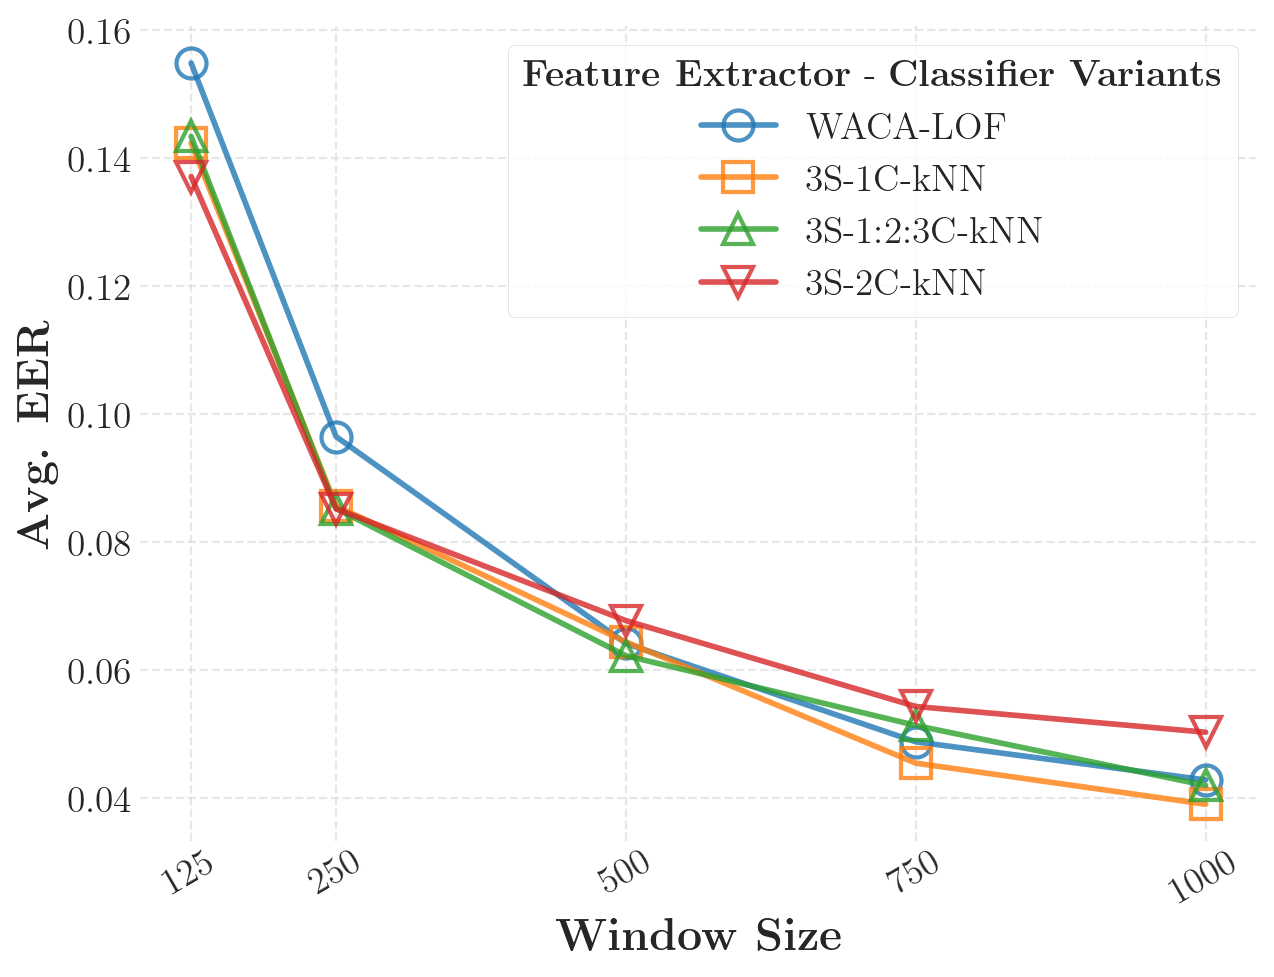

In [545]:
factor=1.5
style = {
    "figure.figsize": (8, 6),
    "font.family": "serif",  # Ensure that we're using a serif font for LaTeX compatibility
    "text.usetex": True,  # Use LaTeX to format labels and titles    
    "font.size": 12*factor,
    "axes.labelsize": 12*factor,
    "axes.titlesize": 14*factor,
    "xtick.labelsize": 10*factor,
    "ytick.labelsize": 10*factor,
    "lines.linewidth": 2*factor*(3/4),
    "lines.markersize": 8*factor,
    "lines.marker": None,
    "lines.markerfacecolor": 'none',
    "lines.markeredgecolor": 'auto',
    "lines.markeredgewidth": 1.5*factor*(3/4),
    "legend.fontsize": 10*factor,
    "legend.title_fontsize": 10*factor,
    "axes.grid": True,
    "grid.alpha": 0.53,
    "grid.linewidth": 0.8*factor*(3/4),
    "grid.color": "#D3D3D3",  # A light gray, you can adjust to preference
    "grid.linestyle": "--",
    "axes.facecolor": "white",  # background color of the axes (plotting area)
    "figure.facecolor": "white",  # background color of the figure
    "axes.edgecolor": "#333333",  # color of the borders
    "axes.spines.top": False,
    "axes.spines.right": False,
    "axes.spines.bottom": True,
    "axes.spines.left": True,
    
    # "font.weight": "bold",       # Bold all text
    # "axes.labelweight": "bold",  # Bold axis labels (redundant if the above line is used, but listed for clarity)
    # "axes.titleweight": "bold",  # Bold title
    # "legend.fontweight": "bold", # Bold legend text
}

plt.rcParams.update(style)
# plt.rc('text', usetex=True)  # Use LaTeX to format labels and titles


# For top_WACA_clf_eer_df
waca_real = top_WACA_clf_eer_df[top_WACA_clf_eer_df[('', 'type')] == 'Real']
best_waca = waca_real.sort_values(by=('', 'mean rank')).iloc[0]
print(best_waca)
window_sizes = [125, 250, 500, 750, 1000]
waca_eer_values = [best_waca[('Window Size', size)] for size in window_sizes]

# For top_SCNN_clf_eer_df
scnn_real = top_SCNN_clf_eer_df[top_SCNN_clf_eer_df[('', 'type')] == 'Real']
top_3_scnn = scnn_real.sort_values(by=('', 'mean rank')).head(3)
print(top_3_scnn)
scnn_eer_values = [[row[('Window Size', size)] for size in window_sizes] for _, row in top_3_scnn.iterrows()]

'''
SCNN-variantA-kNN (Rank 1 among SCNNs)
SCNN-variantB-kNN (Rank 2 among SCNNs)
SCNN-variantC-kNN (Rank 3 among SCNNs)
WACA-LOF (Top-ranked WACA variant)
'''
# Plot
plt.plot(window_sizes, waca_eer_values, label='WACA-LOF', marker=markers[0], alpha=0.8)
# for i, row in enumerate(scnn_eer_values):
#     plt.plot(window_sizes, row, label=f'CNN{i+1}-kNN (Rank {i+1} among CNNs)', marker=markers[i+1])

plt.plot(window_sizes, scnn_eer_values[0], label=f'3S-1C-kNN', marker=markers[1], alpha=0.8)
plt.plot(window_sizes, scnn_eer_values[1], label=f'3S-1:2:3C-kNN', marker=markers[2], alpha=0.8)
plt.plot(window_sizes, scnn_eer_values[2], label=f'3S-2C-kNN', marker=markers[3], alpha=0.8)

plt.tick_params(axis='x', rotation=30)
# plt.ylim(-0.015, 0.3)

plt.xticks(window_sizes)
plt.grid(True)

plt.legend(frameon=True, title=r"\textbf{Feature Extractor} - \textbf{Classifier Variants}", title_fontsize='small')
plt.xlabel(r'\textbf{Window Size}')
plt.ylabel(r'\textbf{Avg. EER}')

plt.savefig("./thesis_tables_and_figures/classifier_WACA_vs_top3_SCNN_eer.svg", format="svg")


plt.show()



In [ ]:
# Assuming 'df' is your DataFrame
# Extract the columns corresponding to the window sizes
window_sizes = [125, 250, 500, 750, 1000]
eer_values = best_WACA_df.loc[1]

# eer_values = best_WACA_df[('Window Size', [125, 250, 500, 750, 1000])]

# Take the mean of EER values (if you have multiple rows and want to average over them)
# mean_eer = eer_values.mean()

# Plotting
plt.figure(figsize=(10, 6))
eer_values.plot(kind='line', marker='o')

plt.title("EER vs Window Size")
plt.xlabel("Window Size")
plt.ylabel("EER")
plt.grid(True)
plt.tight_layout()

plt.show()

In [ ]:
minkowski_p_label={1: "Manhattan", 2: "Euclidean", 5: "p=5"}

# Convert the dictionary to a DataFrame
df = pd.DataFrame(data_dict_exp2)

# Create a line plot with multiple series
plt.plot(data_dict_exp2['x'], data_dict_exp2[1], label=minkowski_p_label[1])
plt.plot(data_dict_exp2['x'], data_dict_exp2[2], label=minkowski_p_label[2])
plt.plot(data_dict_exp2['x'], data_dict_exp2[5], label=minkowski_p_label[5])


plt.xticks(df['x'])

# Add labels, legend, and title
plt.xlabel('Window Size')
plt.ylabel('Avg. EER')
plt.title('Minkowski Distances Exp2')
plt.legend()

# Show the plot
plt.show()

In [304]:
print(top_SCNN_clf_eer_df[list(top_SCNN_clf_eer_df.columns[:7])
].style.format(STYLER_ERR_FORMAT_DICT).hide(axis='index').to_latex())

\begin{tabular}{rllrlll}
\multicolumn{7}{r}{} \\
mean rank & scnn_archi_name & classifier & cut_off_freq & EMA_span & SMA_winsize & type \\
1 & SCNN_3_1_conv_1_dense_arg_dict_default & kNN & 33 & 20 & -- & Real \\
2 & SCNN_3_123_conv_1_dense_arg_dict_default & kNN & 33 & 20 & -- & Real \\
3 & SCNN_3_2_conv_1_dense_arg_dict_default & kNN & 33 & 20 & -- & Real \\
4 & SCNN_3_1_conv_1_dense_arg_dict_default & LOF & 33 & 20 & -- & Real \\
5 & SCNN_3_123_conv_1_dense_arg_dict_default & OCSVM & 33 & 20 & -- & Real \\
6 & SCNN_3_123_conv_1_dense_arg_dict_default & LOF & 33 & 20 & -- & Real \\
7 & SCNN_3_2_conv_1_dense_arg_dict_default & LOF & 33 & 20 & -- & Real \\
8 & SCNN_3_1_conv_1_dense_arg_dict_default & OCSVM & 33 & 20 & -- & Real \\
9 & SCNN_3_2_conv_1_dense_arg_dict_default & OCSVM & 33 & 20 & -- & Real \\
10 & SCNN_3_123_conv_1_dense_arg_dict_default & IF & 33 & -- & -- & Real \\
11 & SCNN_3_1_conv_1_dense_arg_dict_default & IF & 33 & -- & -- & Real \\
12 & SCNN_3_123_conv_1_dense_arg

In [ ]:
print(top_SCNN_clf_eer_df[list(top_SCNN_clf_eer_df.columns)[:1]+list(top_SCNN_clf_eer_df.columns[7:])
].style.format(STYLER_ERR_FORMAT_DICT).hide(axis='index').to_latex())

In [305]:
print(top_WACA_clf_eer_df_max1000[list(top_WACA_clf_eer_df_max1000.columns)[:1]+list(top_WACA_clf_eer_df_max1000.columns[7:])
].style.format(STYLER_ERR_FORMAT_DICT).hide(axis='index').to_latex())

\begin{tabular}{rrrrrrr}
 & \multicolumn{4}{r}{Window Size} & \multicolumn{2}{r}{} \\
mean rank & 250 & 500 & 750 & 1000 & mean & variance \\
1 & 0.091 & 0.062 & 0.050 & 0.041 & 0.075 & 0.001 \\
2 & 0.097 & 0.064 & 0.049 & 0.043 & 0.081 & 0.002 \\
3 & 0.097 & 0.069 & 0.055 & 0.044 & 0.082 & 0.002 \\
4 & 0.101 & 0.067 & 0.054 & 0.045 & 0.084 & 0.002 \\
5 & 0.099 & 0.063 & 0.053 & 0.046 & 0.084 & 0.002 \\
6 & 0.102 & 0.066 & 0.054 & 0.046 & 0.086 & 0.002 \\
7 & 0.105 & 0.068 & 0.048 & 0.044 & 0.089 & 0.003 \\
8 & 0.108 & 0.068 & 0.060 & 0.049 & 0.090 & 0.002 \\
9 & 0.114 & 0.068 & 0.054 & 0.048 & 0.095 & 0.004 \\
10 & 0.164 & 0.143 & 0.135 & 0.119 & 0.151 & 0.001 \\
11 & 0.187 & 0.154 & 0.142 & 0.139 & 0.172 & 0.002 \\
12 & 0.191 & 0.165 & 0.146 & 0.145 & 0.177 & 0.002 \\
\end{tabular}



In [315]:
print(df_concat.style.format(STYLER_ERR_FORMAT_DICT).hide(axis='index').to_latex())

\begin{tabular}{rllllllrrrrrrr}
\multicolumn{7}{r}{} & \multicolumn{5}{r}{Window Size} & \multicolumn{2}{r}{} \\
mean rank & scnn_archi_name & classifier & cut_off_freq & EMA_span & SMA_winsize & type & 125 & 250 & 500 & 750 & 1000 & mean & variance \\
1 & SCNN_3_1_conv_1_dense_arg_dict_default & kNN & 33 & 20 & -- & Real & 0.142 & 0.086 & 0.064 & 0.045 & 0.039 & 0.075 & 0.002 \\
2 & SCNN_3_123_conv_1_dense_arg_dict_default & kNN & 33 & 20 & -- & Real & 0.143 & 0.085 & 0.062 & 0.051 & 0.042 & 0.077 & 0.002 \\
3 & SCNN_3_2_conv_1_dense_arg_dict_default & kNN & 33 & 20 & -- & Real & 0.137 & 0.085 & 0.068 & 0.054 & 0.050 & 0.079 & 0.001 \\
2 & nan & LOF & 26 & - & 2 & Real & 0.155 & 0.097 & 0.064 & 0.049 & 0.043 & 0.081 & 0.002 \\
\end{tabular}



In [311]:
top_SCNN_clf_eer_df.iloc[:3]

\
  mean rank                           scnn_archi_name classifier cut_off_freq   
3         1    SCNN_3_1_conv_1_dense_arg_dict_default        kNN           33   
4         2  SCNN_3_123_conv_1_dense_arg_dict_default        kNN           33   
5         3    SCNN_3_2_conv_1_dense_arg_dict_default        kNN           33   

                             Window Size                                \
  EMA_span SMA_winsize  type         125       250       500       750   
3       20          --  Real    0.142373  0.085673  0.064436  0.045488   
4       20          --  Real    0.143395  0.085263  0.062271  0.051380   
5       20          --  Real    0.137136  0.085230  0.067760  0.054343   

                                 
       1000      mean  variance  
3  0.039070  0.075408  0.001731  
4  0.042005  0.076863  0.001644  
5  0.050316  0.078957  0.001244

In [309]:
top_WACA_clf_eer_df_max1000.iloc[1:2]

Window Size  \
   mean rank classifier cut_off_freq EMA_span SMA_winsize  type         125   
11         2        LOF           26        -           2  Real    0.154874   

                                                               
         250      500       750      1000      mean  variance  
11  0.096507  0.06419  0.048822  0.042864  0.081451  0.002117

In [312]:
df_concat = pd.concat([top_SCNN_clf_eer_df.iloc[:3], top_WACA_clf_eer_df_max1000.iloc[1:2]], axis=0, ignore_index=True)
df_concat

\
  mean rank                           scnn_archi_name classifier cut_off_freq   
0         1    SCNN_3_1_conv_1_dense_arg_dict_default        kNN           33   
1         2  SCNN_3_123_conv_1_dense_arg_dict_default        kNN           33   
2         3    SCNN_3_2_conv_1_dense_arg_dict_default        kNN           33   
3         2                                       NaN        LOF           26   

                             Window Size                                \
  EMA_span SMA_winsize  type         125       250       500       750   
0       20          --  Real    0.142373  0.085673  0.064436  0.045488   
1       20          --  Real    0.143395  0.085263  0.062271  0.051380   
2       20          --  Real    0.137136  0.085230  0.067760  0.054343   
3        -           2  Real    0.154874  0.096507  0.064190  0.048822   

                                 
       1000      mean  variance  
0  0.039070  0.075408  0.001731  
1  0.042005  0.076863  0.001644  
2  0.050316  0.078957  0.001244  
3  0.042864  0.081451  0.002117

In [325]:
def return_final_relative_result_df_as_json(df, base_case_index, window_size_lst):
    window_size_cols=[('Window Size', winsize) for winsize in window_size_lst]
    # columns you want to apply the operation to
    selected_columns = window_size_cols+[("", "mean"), ("", "variance")]

    # apply the operation to selected columns
    df_selected = df[selected_columns]
    # get the other columns
    df_others = df.drop(columns=selected_columns)

    # Convert the DataFrame to percentage improvement relative to base case
    df_relative = df_selected.loc[base_case_index].subtract(df_selected)

    # Convert to percentage improvement
    df_relative = df_relative.divide(df_selected.loc[base_case_index], axis=1) * 100

    # concatenate the dataframes along the column axis
    df_relative = pd.concat([df_others, df_relative], axis=1)
    
    
    return df_relative

relative_df=return_final_relative_result_df_as_json(df_concat, 3, WINDOW_SIZE_LST_NN)
relative_df

\
  mean rank                           scnn_archi_name classifier cut_off_freq   
0         1    SCNN_3_1_conv_1_dense_arg_dict_default        kNN           33   
1         2  SCNN_3_123_conv_1_dense_arg_dict_default        kNN           33   
2         3    SCNN_3_2_conv_1_dense_arg_dict_default        kNN           33   
3         2                                       NaN        LOF           26   

                             Window Size                                  \
  EMA_span SMA_winsize  type         125        250       500        750   
0       20          --  Real    8.071956  11.226014 -0.382343   6.827586   
1       20          --  Real    7.412007  11.651155  2.989225  -5.241379   
2       20          --  Real   11.453307  11.685626 -5.561349 -11.310345   
3        -           2  Real    0.000000   0.000000  0.000000   0.000000   

                                   
        1000      mean   variance  
0   8.851422  7.419701  18.225044  
1   2.002107  5.633184  22.373595  
2 -17.386723  3.062288  41.250603  
3   0.000000  0.000000   0.000000

In [323]:
(0.002117- 0.001244)/0.002117

0.4123760037789324

In [326]:
print(relative_df[list(relative_df.columns)[:1]+list(relative_df.columns[7:])
].style.format(STYLER_ERR_FORMAT_DICT).hide(axis='index').to_latex())


\begin{tabular}{rrrrrrrr}
 & \multicolumn{5}{r}{Window Size} & \multicolumn{2}{r}{} \\
mean rank & 125 & 250 & 500 & 750 & 1000 & mean & variance \\
1 & 8.072 & 11.226 & -0.382 & 6.828 & 8.851 & 7.420 & 18.225 \\
2 & 7.412 & 11.651 & 2.989 & -5.241 & 2.002 & 5.633 & 22.374 \\
3 & 11.453 & 11.686 & -5.561 & -11.310 & -17.387 & 3.062 & 41.251 \\
2 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 \\
\end{tabular}



In [353]:
CLASSIFIER_TYPE_LST

['OCSVM', 'kNN', 'LOF', 'IF']

In [370]:
top_eer_df_lst=[]
top_gini_df_lst=[]
for clf_name in CLASSIFIER_TYPE_LST[:-1]:
    eer_df = pd.read_json(f"{FINAL_EXP_RESULTS_PATH}/WACA-{clf_name}/WACA-{clf_name}-overlap-df.json")
    
    idx_tuples = [eval(i) for i in eer_df.columns.tolist()]

    # both eer_df and gini_df have same columns
    # Convert list of tuples back to a MultiIndex
    multiindex_columns = pd.MultiIndex.from_tuples(idx_tuples)

    eer_df.columns = multiindex_columns
    top_eer_df = eer_df.loc[[eer_df[("", "mean rank")].idxmin()]]
    # min_mean_rank_idx = eer_df[('', 'mean rank')].idxmin()
    # top_eer_df = eer_df.loc[min_mean_rank_idx]

    top_eer_df.insert(0, ("", "classifier"), clf_name)
    
    top_eer_df_lst.append(top_eer_df)


# EER
top_clf_eer_df = pd.concat(top_eer_df_lst)
top_clf_eer_df.drop(("", 'mean rank'), axis=1, inplace=True)
top_clf_eer_df.reset_index(drop=True, inplace=True)

top_clf_eer_df.insert(0, ("", 'Rank'), top_clf_eer_df[("", "mean")].rank(method='min').astype(np.int64))
top_clf_eer_df=top_clf_eer_df.sort_values(("", 'Rank'))
WACA_overlap_top_clf_eer_df=top_clf_eer_df

WACA_overlap_top_clf_eer_df

Window Size                                          \
  Rank classifier overlap         125       250       500       750      1000   
2    1        LOF    0.45    0.158228  0.103168  0.064519  0.053481  0.043944   
0    2      OCSVM    0.17    0.169819  0.109314  0.071778  0.053086  0.041081   
1    3        kNN    0.53    0.192253  0.116105  0.068371  0.056258  0.045952   

                                                               
       1250      1500      1750      2000      mean  variance  
2  0.038825  0.037577  0.039506  0.032613  0.063540  0.001730  
0  0.042019  0.038565  0.037831  0.040370  0.067096  0.002030  
1  0.040850  0.036839  0.038194  0.037566  0.070265  0.002732

In [371]:
print(WACA_overlap_top_clf_eer_df[list(WACA_overlap_top_clf_eer_df.columns[:7])
].style.format(STYLER_ERR_FORMAT_DICT).hide(axis='index').to_latex())

\begin{tabular}{rlrrrrr}
\multicolumn{3}{r}{} & \multicolumn{4}{r}{Window Size} \\
Rank & classifier & overlap & 125 & 250 & 500 & 750 \\
1 & LOF & 0.450000 & 0.158 & 0.103 & 0.065 & 0.053 \\
2 & OCSVM & 0.170000 & 0.170 & 0.109 & 0.072 & 0.053 \\
3 & kNN & 0.530000 & 0.192 & 0.116 & 0.068 & 0.056 \\
\end{tabular}



In [372]:
print(WACA_overlap_top_clf_eer_df[list(WACA_overlap_top_clf_eer_df.columns[:1])+ list(WACA_overlap_top_clf_eer_df.columns[7:])
].style.format(STYLER_ERR_FORMAT_DICT).hide(axis='index').to_latex())

\begin{tabular}{rrrrrrrr}
 & \multicolumn{5}{r}{Window Size} & \multicolumn{2}{r}{} \\
Rank & 1000 & 1250 & 1500 & 1750 & 2000 & mean & variance \\
1 & 0.044 & 0.039 & 0.038 & 0.040 & 0.033 & 0.064 & 0.002 \\
2 & 0.041 & 0.042 & 0.039 & 0.038 & 0.040 & 0.067 & 0.002 \\
3 & 0.046 & 0.041 & 0.037 & 0.038 & 0.038 & 0.070 & 0.003 \\
\end{tabular}

